# Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

e:\SAMS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
os.getcwd()

'e:\\SAMS\\notebooks'

In [3]:
datasets = os.path.dirname(os.getcwd())
datasets = os.path.join(datasets, "datasets")
print(datasets)

e:\SAMS\datasets


In [4]:
clim = os.path.join(datasets, "clim")

In [5]:
os.listdir(clim)

['clim.xlsx', 'rad.xlsx']

# Importing datasets

Here we will import the datasets of one position extracted through the online application to make models and get an idea on which model will perform well on the basis of certain parameters we believe to be really important in the process of estimating crop yield.
Though, the actual prediction model uses more variables (some climate variables which will not be explored here, soil parameters which are constant and will be retrieved directly through the Harmonized World Soil Database 2.0 by FAO), keep in head that the purpose of this notebook is to establish models that are the most effective in terms of prediction of certain variables. We will then make a grid search in the real application using the model (the one that performs the best globally, this does not apply if the model is Prophet) to find out which parameters of the model allows the model to perform the best for the variable.

In [6]:
data_clim = pd.read_excel(os.path.join(clim, os.listdir(clim)[0]))
data_rad = pd.read_excel(os.path.join(clim, os.listdir(clim)[1]))

In [7]:
data_clim.rename(columns={"Unnamed: 0": 'ds'}, inplace=True)
data_rad.rename(columns={"Unnamed: 0": 'ds'}, inplace=True)

In [8]:
data_clim.head()

ds  EVLAND  EVPTRNS  GWETPROF  WS2M    T2M     TS  QV2M   RH2M  \
0 1995-01-01    6.49     0.00      0.41  3.55  -5.46  -6.49  1.46  56.88   
1 1995-01-02    4.73     0.00      0.41  2.45  -4.74  -5.18  1.71  62.06   
2 1995-01-03    2.82     0.00      0.41  2.18  -8.85  -8.69  1.40  72.62   
3 1995-01-04    2.17     0.01      0.41  2.59 -10.43 -10.35  1.34  81.81   
4 1995-01-05    4.61     0.01      0.41  5.77  -3.44  -3.45  2.62  82.38   

      PS    WD2M  CLOUD_AMT_DAY  PW  T2MDEW  FROST_DAYS  GWETROOT  GWETTOP  \
0  92.42  288.88            NaN NaN  -12.70         1.0      0.41     0.41   
1  92.36  151.06            NaN NaN  -10.95         1.0      0.41     0.41   
2  92.74  183.88            NaN NaN  -13.02         1.0      0.41     0.41   
3  92.70  171.62            NaN NaN  -13.35         1.0      0.40     0.41   
4  90.66  178.94            NaN NaN   -6.39         1.0      0.41     0.42   

   PRECTOTCORR   Z0M  
0         0.01  0.03  
1         0.20  0.03  
2         0.03  0.03  
3         0.00  0.03  
4         0.03  0.03

In [9]:
data_rad.head()

ds  ALLSKY_SFC_SW_DWN  ALLSKY_SFC_LW_UP  T2M_MIN  T2M_MAX  WS2M  \
0 1995-01-01               7.75             24.89    -9.38    -0.02  3.55   
1 1995-01-02               5.94             24.49    -8.59     1.09  2.45   
2 1995-01-03               8.19             23.42   -12.02    -5.49  2.18   
3 1995-01-04               8.04             23.00   -14.45    -4.68  2.59   
4 1995-01-05               3.78             24.95    -9.40     3.76  5.77   

    RH2M       ET0  
0  56.88  1.001230  
1  62.06  0.819602  
2  72.62  0.438753  
3  81.81  0.344787  
4  82.38  0.661706

## Variables to be predicted

Here we will go through the prediction of the following variables:
Evapotranspiration reference ET0, All Sky Surface ShortWave Downward Radiation ALLSKY_SFC_SW_DWN, All Sky Surface LongWave Upward Radiation ALLSKY_SFC_LW_UP, Relative Humidity at 2 meters RH2M, Wind Speed at 2 meters WS2M (in data_rad), Temperature at 2 meters T2M, Precipitation corrected PRECTOTCORR

In [237]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sktime.forecasting.trend import STLForecaster,PolynomialTrendForecaster
from sktime.forecasting.base import ForecastingHorizon
from sklearn.linear_model import LinearRegression
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from pandas import Timedelta, DateOffset
from numpy import log, exp, arange

In [238]:
params_rad = ["ET0", "ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_LW_UP", "RH2M", "WS2M"]
params_clim = ["T2M", "PRECTOTCORR"]

In [239]:
forecasting_horizon=5*365
seasonal_length=Timedelta(days=365)
data_frequency=Timedelta(days=1)

Models for ET0...
Prophet...


C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.rename(columns={param: 'y'}, inplace=True)
12:00:02 - cmdstanpy - INFO - Chain [1] start processing
12:00:02 - cmdstanpy - INFO - Chain [1] done processing


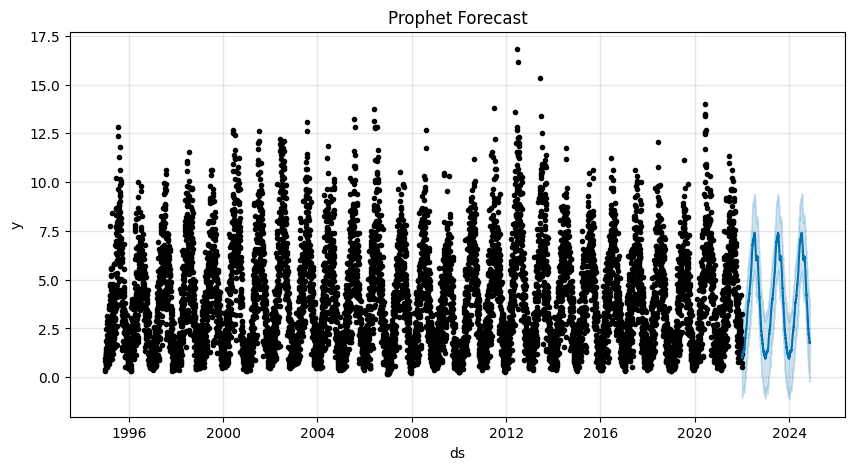

mean_squared_error:  1.621861290863628
mean_absolute_percentage_error:  63.960416431188335
STLForecaster...


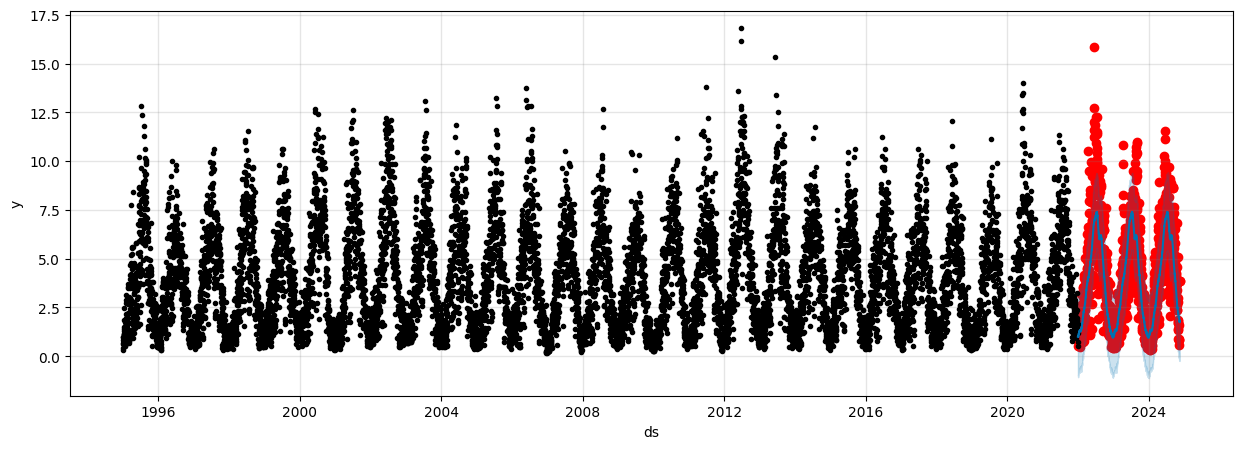

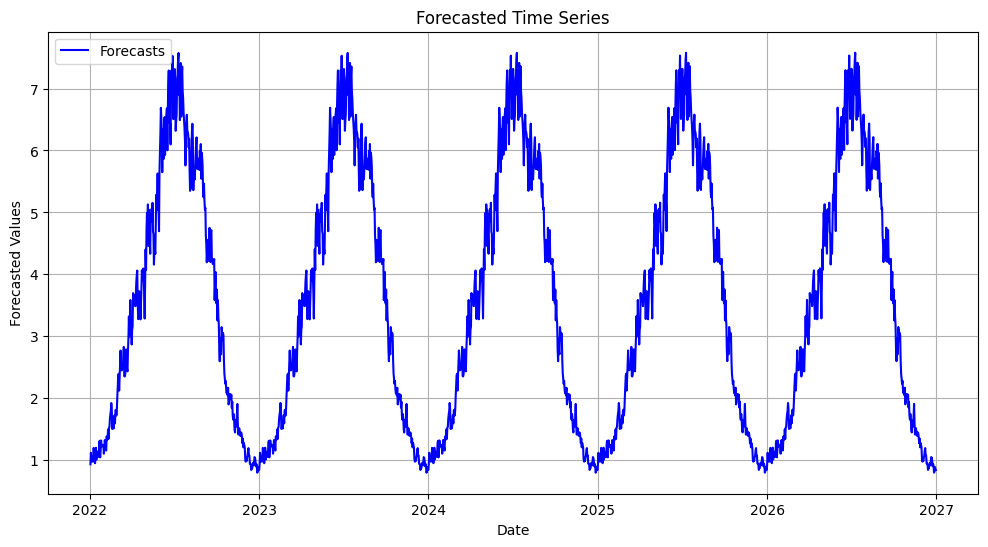

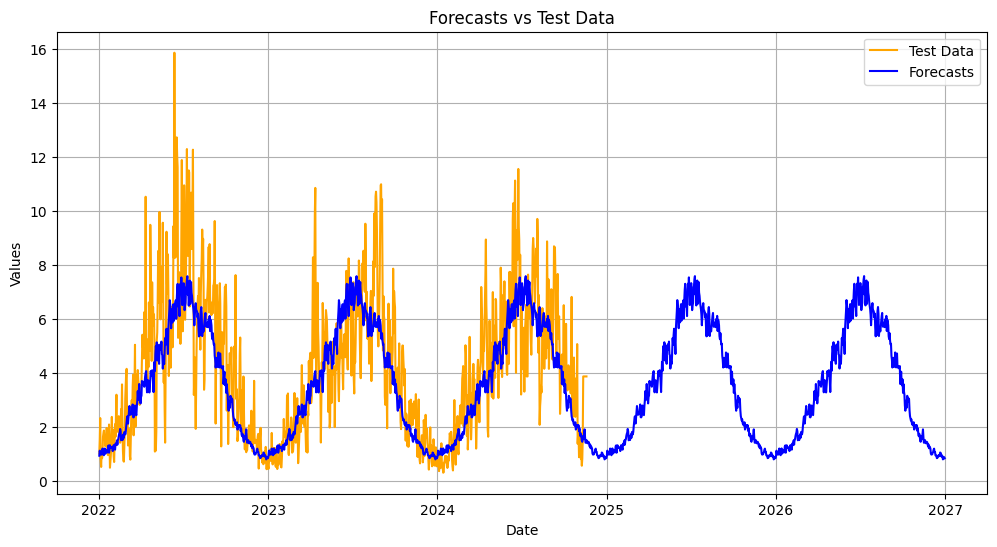

mean_squared_error:  1.72780689107764
mean_absolute_percentage_error:  64.3318712942389
Models for ALLSKY_SFC_SW_DWN...
Prophet...


C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.rename(columns={param: 'y'}, inplace=True)
12:00:47 - cmdstanpy - INFO - Chain [1] start processing
12:00:47 - cmdstanpy - INFO - Chain [1] done processing


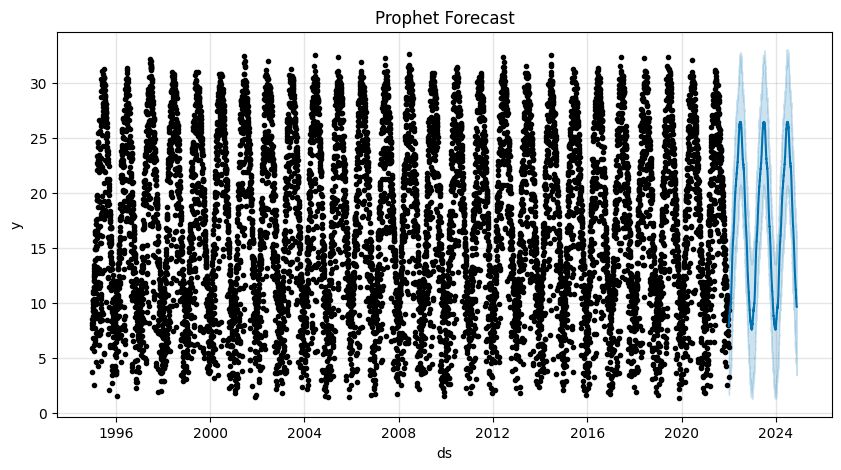

mean_squared_error:  4.63774231607617
mean_absolute_percentage_error:  67.85735365470667
STLForecaster...


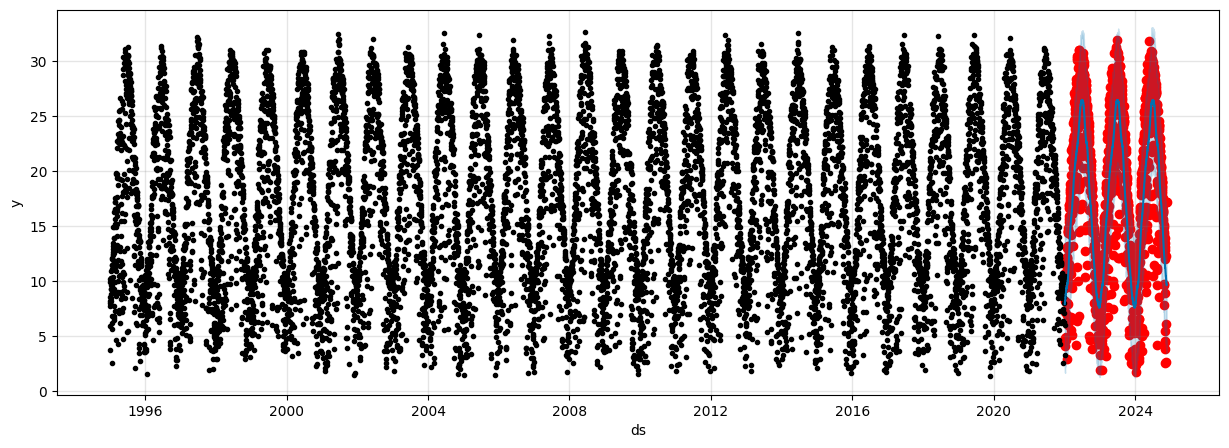

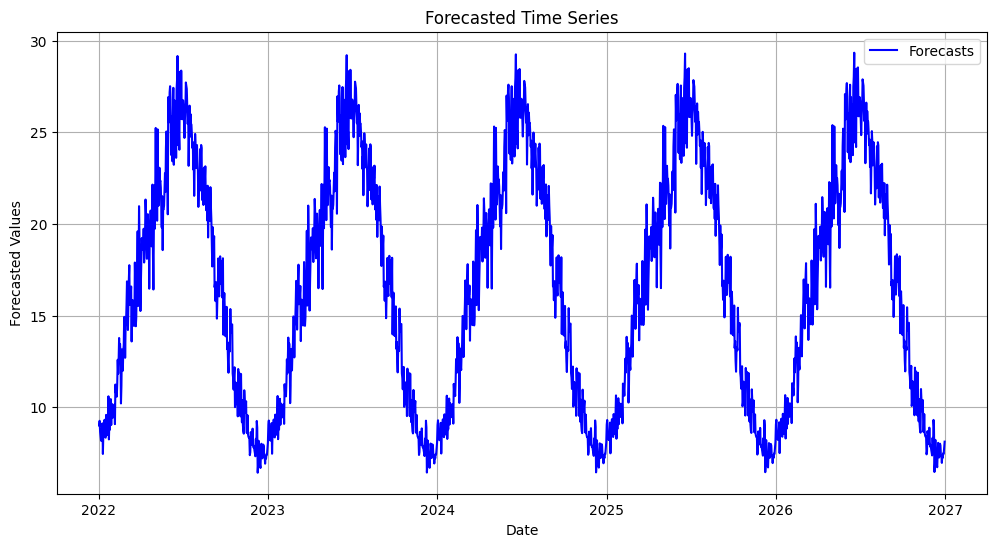

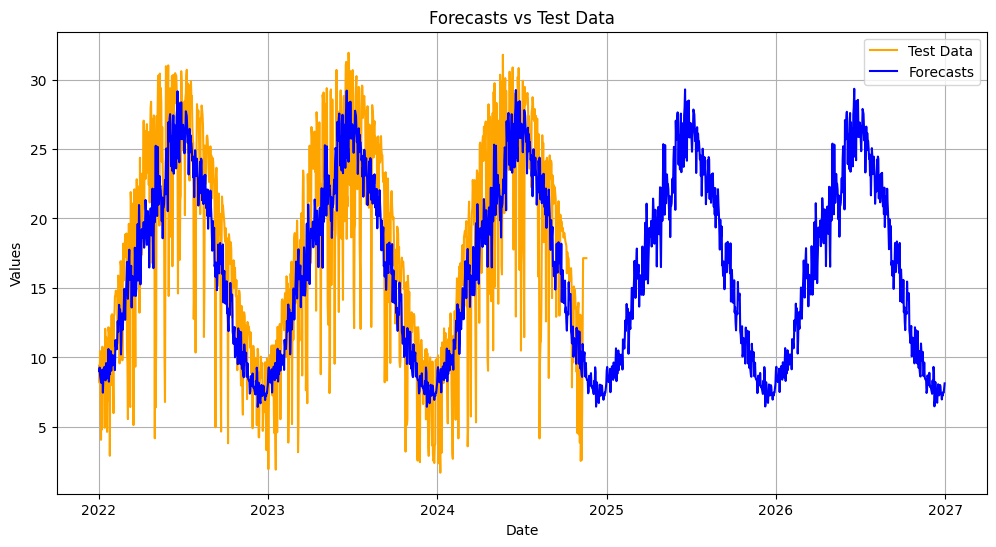

mean_squared_error:  4.9875507912916115
mean_absolute_percentage_error:  66.64518705406131
Models for ALLSKY_SFC_LW_UP...
Prophet...


C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.rename(columns={param: 'y'}, inplace=True)
12:01:30 - cmdstanpy - INFO - Chain [1] start processing
12:01:31 - cmdstanpy - INFO - Chain [1] done processing


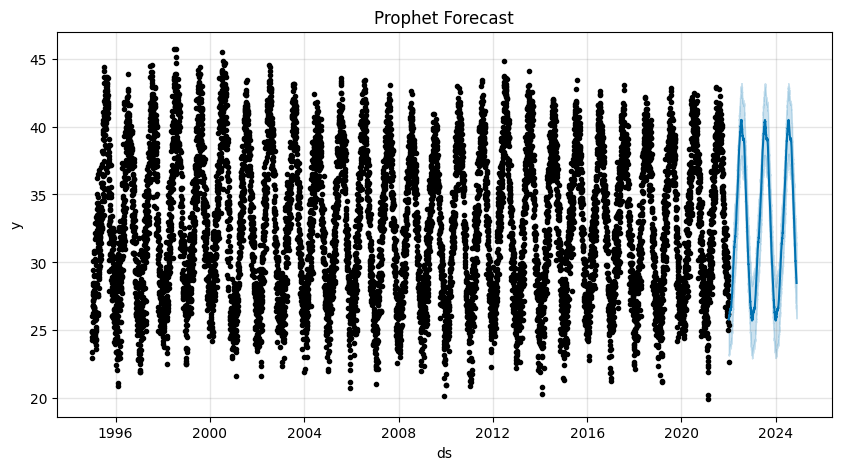

mean_squared_error:  2.7298762690641825
mean_absolute_percentage_error:  93.54382160039971
STLForecaster...


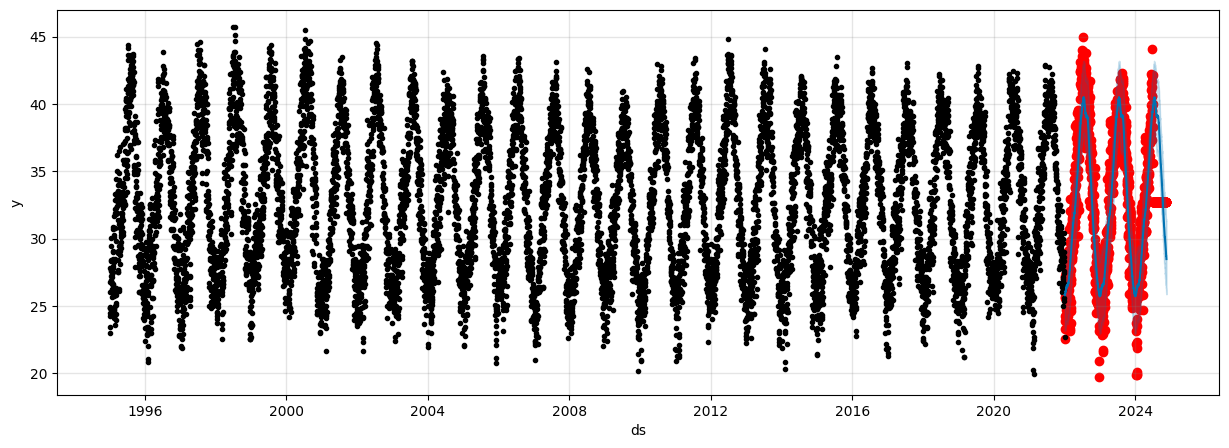

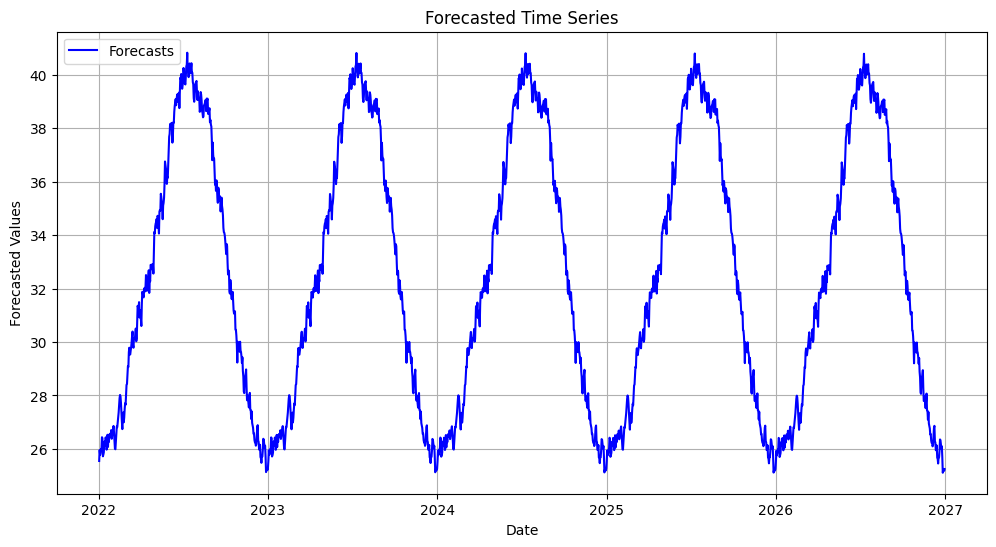

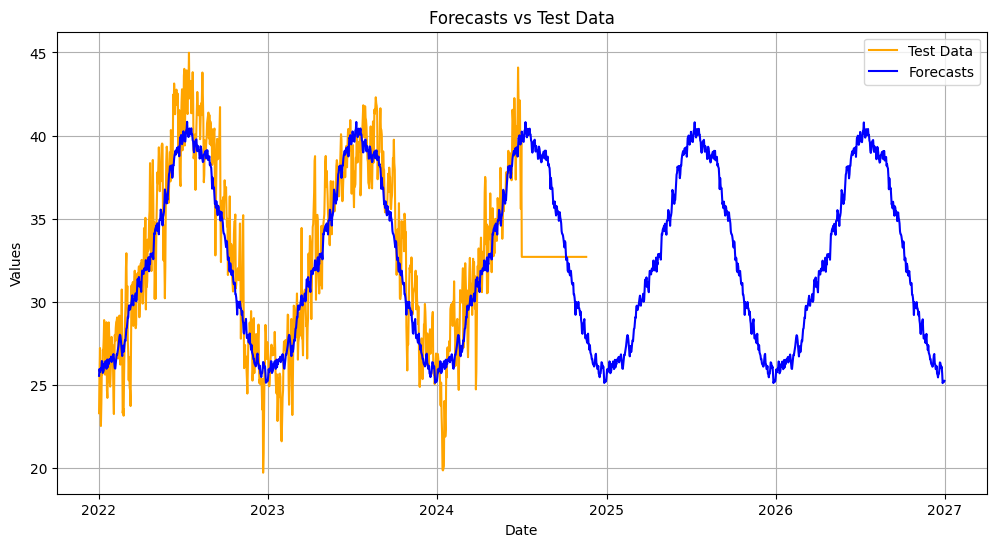

mean_squared_error:  2.7546083466314877
mean_absolute_percentage_error:  93.39718311957711
Models for RH2M...
Prophet...


C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.rename(columns={param: 'y'}, inplace=True)
12:02:13 - cmdstanpy - INFO - Chain [1] start processing
12:02:14 - cmdstanpy - INFO - Chain [1] done processing


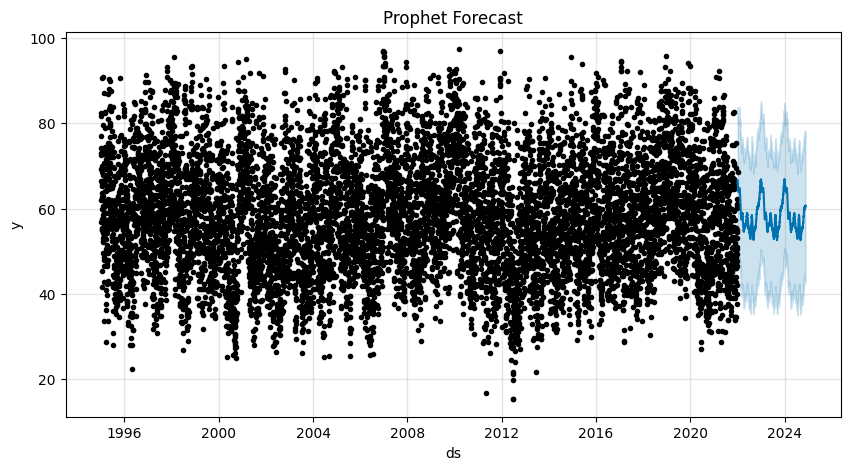

mean_squared_error:  13.472026700844035
mean_absolute_percentage_error:  76.38246657537091
STLForecaster...


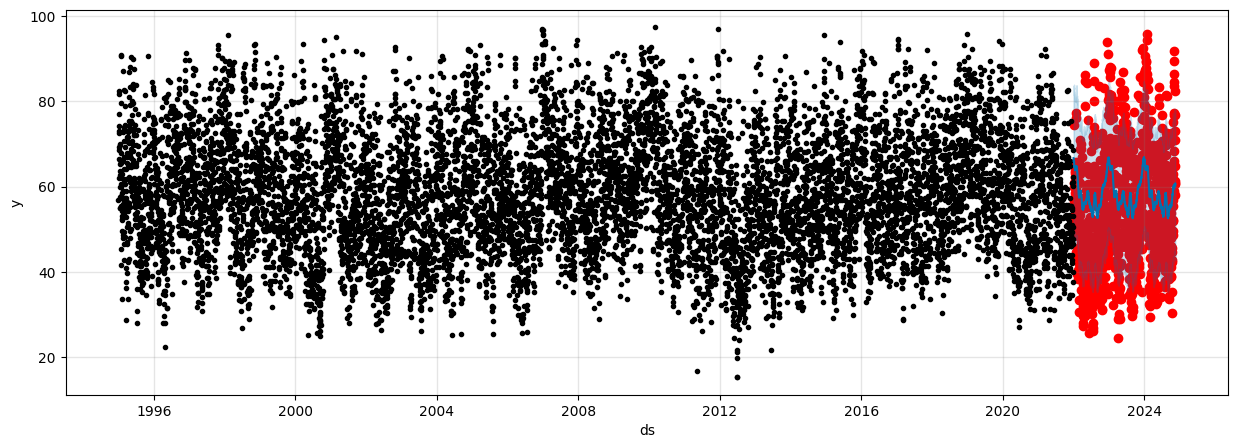

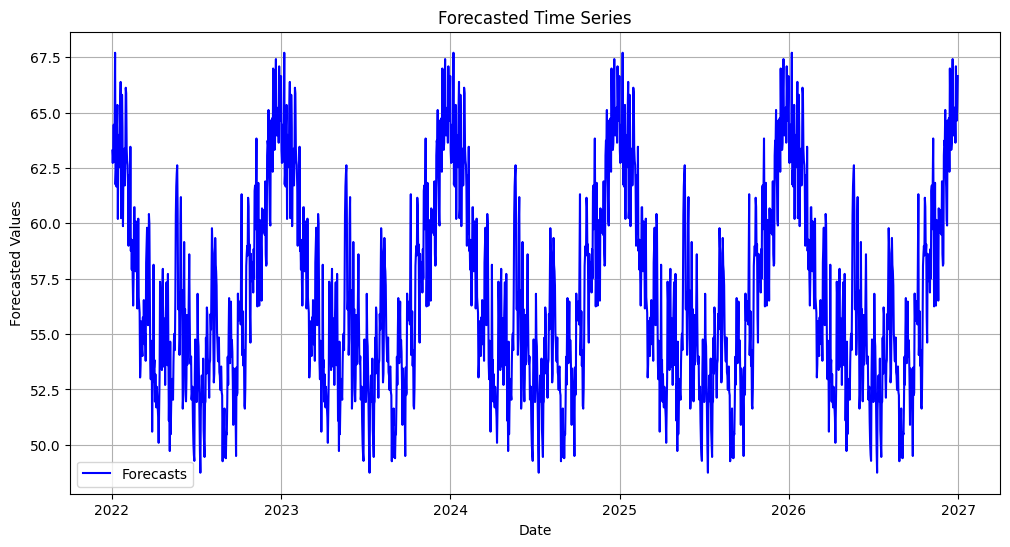

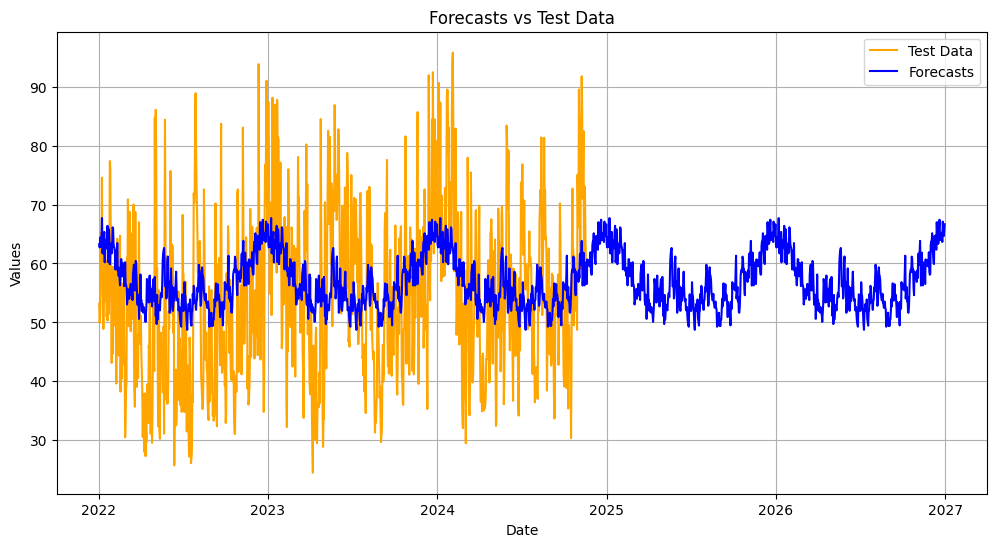

mean_squared_error:  13.386978488324528
mean_absolute_percentage_error:  77.27209277300875
Models for WS2M...
Prophet...


C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1837005088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.rename(columns={param: 'y'}, inplace=True)
12:02:54 - cmdstanpy - INFO - Chain [1] start processing
12:02:55 - cmdstanpy - INFO - Chain [1] done processing


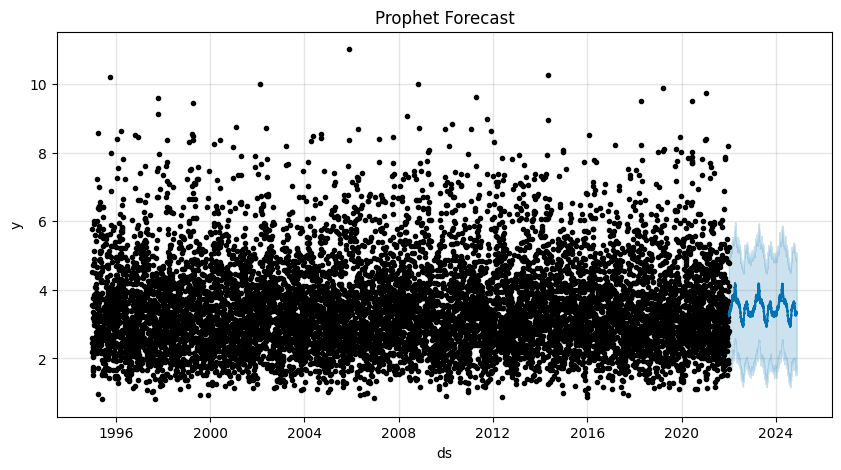

mean_squared_error:  1.3476922537049218
mean_absolute_percentage_error:  62.7313092149092
STLForecaster...


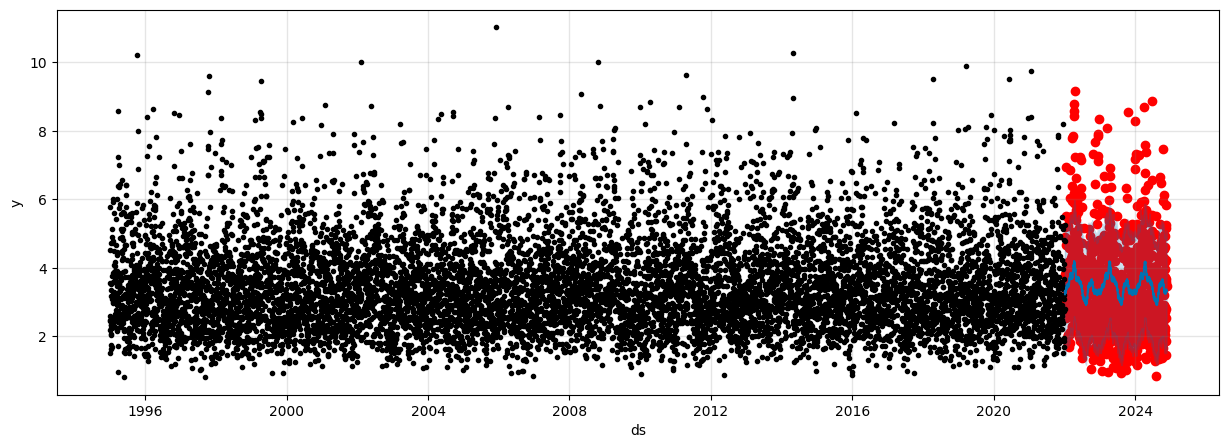

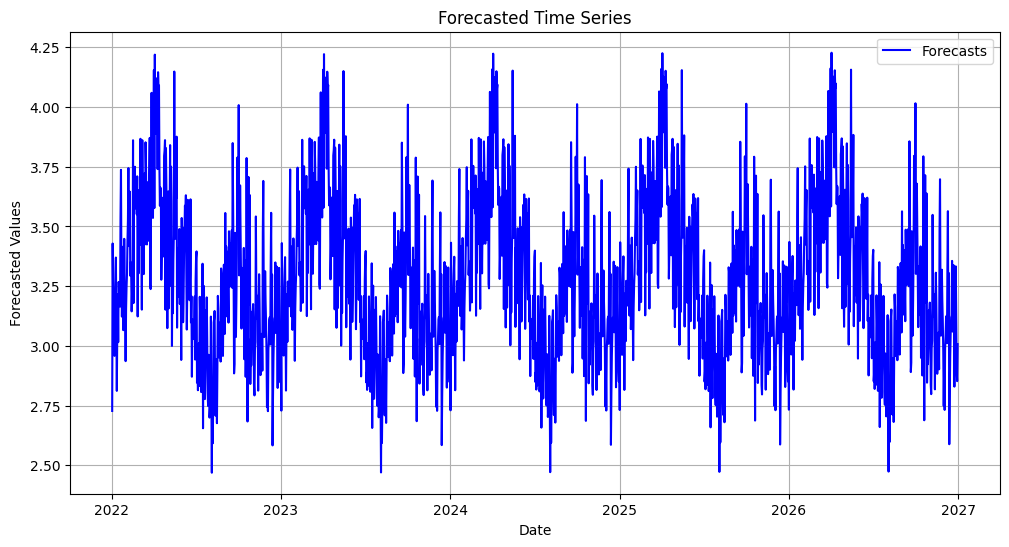

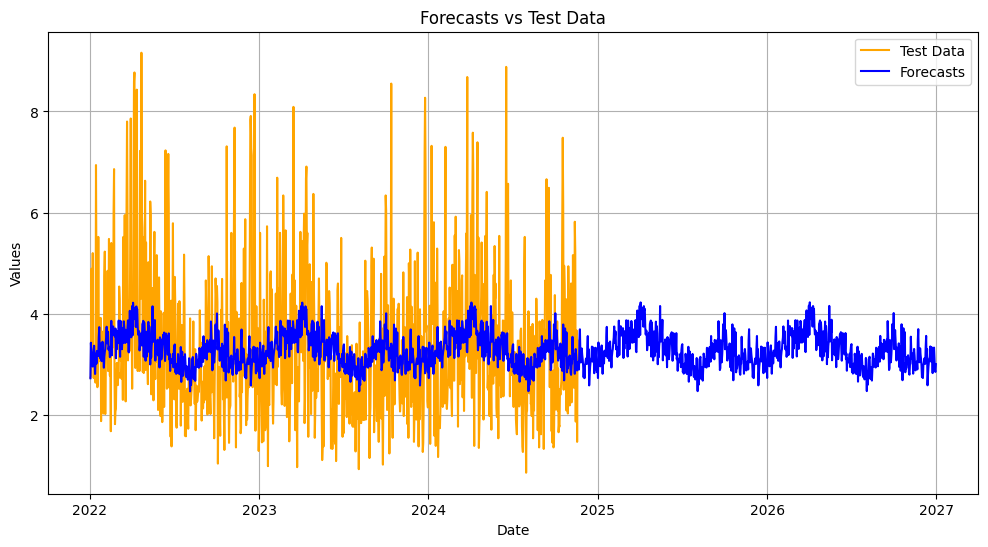

mean_squared_error:  1.356454089448719
mean_absolute_percentage_error:  65.39741988596903


In [240]:
for param in params_rad:
    print(f"Models for {param}...")
    print("Prophet...")
    dt = data_rad[["ds",param]]
    imputer = KNNImputer(n_neighbors=5)
    dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
    dt.rename(columns={param: 'y'}, inplace=True)

    split_date = '2022-01-01'
    train = dt.loc[dt["ds"] <= split_date].copy()
    test = dt.loc[dt["ds"] > split_date].copy()

    model = Prophet(growth="flat", seasonality_mode = 'additive')
    model.fit(train)
    test_fcst = model.predict(test)
    fig, ax = plt.subplots(figsize=(10, 5))
    fig = model.plot(test_fcst, ax=ax)
    ax.set_title('Prophet Forecast')
    plt.show()

    f, ax = plt.subplots(figsize=(15, 5))
    ax.scatter(test['ds'], test['y'], color='r')
    fig = model.plot(test_fcst, ax=ax)

    mse = np.sqrt(mean_squared_error(y_true=test['y'],
                   y_pred=test_fcst['yhat']))
    print(f"mean_squared_error:  {mse}")
    mape = 100*(1 - mean_absolute_percentage_error(y_true=test['y'], y_pred=test_fcst['yhat']))
    print(f"mean_absolute_percentage_error:  {mape}")

    print("STLForecaster...")
    seasonal_length_int=int(seasonal_length/data_frequency)
    model=STLForecaster(
        sp=seasonal_length_int,
        forecaster_seasonal=NaiveForecaster(
            sp=seasonal_length_int,
            strategy='mean'
        ),
        forecaster_trend=PolynomialTrendForecaster(LinearRegression()),
        robust=True,
    )
    train_h = train.copy()
    train_h['ds'] = pd.to_datetime(train_h['ds'])
    train_h.set_index('ds', inplace=True)
    model.fit(log(train_h))
    values_forecasting_horizon=np.arange(1, forecasting_horizon + 1, dtype='int')
    fh=ForecastingHorizon(values=values_forecasting_horizon,is_relative=True)
    forecasts=exp(model.predict(fh=fh))
    plt.figure(figsize=(12, 6))
    plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue')

    plt.xlabel("Date")
    plt.ylabel("Forecasted Values")
    plt.title("Forecasted Time Series")
    plt.legend()
    plt.grid()
    plt.show()

    test_h = test.copy()
    test_h['ds'] = pd.to_datetime(test_h['ds'])
    test_h.set_index('ds', inplace=True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(test_h.index, test_h['y'], label="Test Data", color='orange', linestyle='-')
    plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue', linestyle='-')
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title("Forecasts vs Test Data")
    plt.legend()
    plt.grid()
    plt.show()

    merged = pd.merge(test_h, forecasts, left_index=True, right_index=True, how='inner', suffixes=('_test', '_forecast'))
    mse = np.sqrt(mean_squared_error(y_true=merged['y_test'],
                   y_pred=merged['y_forecast']))
    print(f"mean_squared_error:  {mse}")
    mape = 100*(1 - mean_absolute_percentage_error(y_true=merged['y_test'], y_pred=merged['y_forecast']))
    print(f"mean_absolute_percentage_error:  {mape}")

Models for T2M...
Prophet...


C:\Users\hp\AppData\Local\Temp\ipykernel_22772\3342716408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
C:\Users\hp\AppData\Local\Temp\ipykernel_22772\3342716408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.rename(columns={param: 'y'}, inplace=True)
12:20:54 - cmdstanpy - INFO - Chain [1] start processing
12:20:55 - cmdstanpy - INFO - Chain [1] done processing


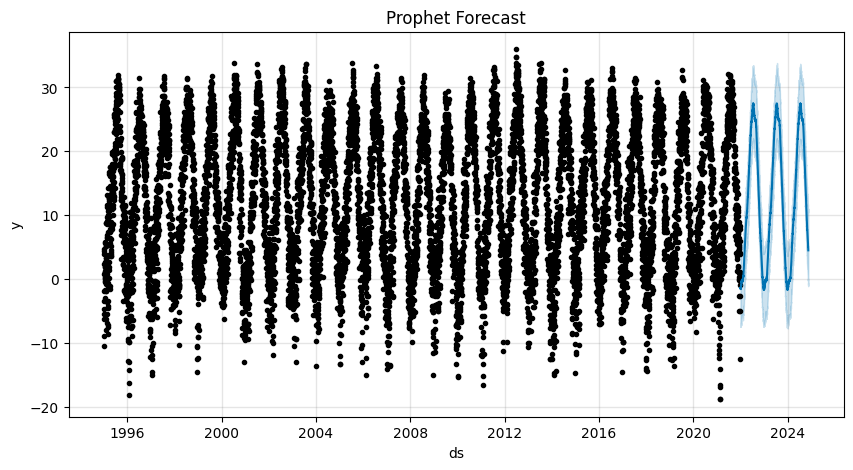

mean_squared_error:  4.599041267899234
mean_absolute_percentage_error:  11.003291738493404
STLForecaster...


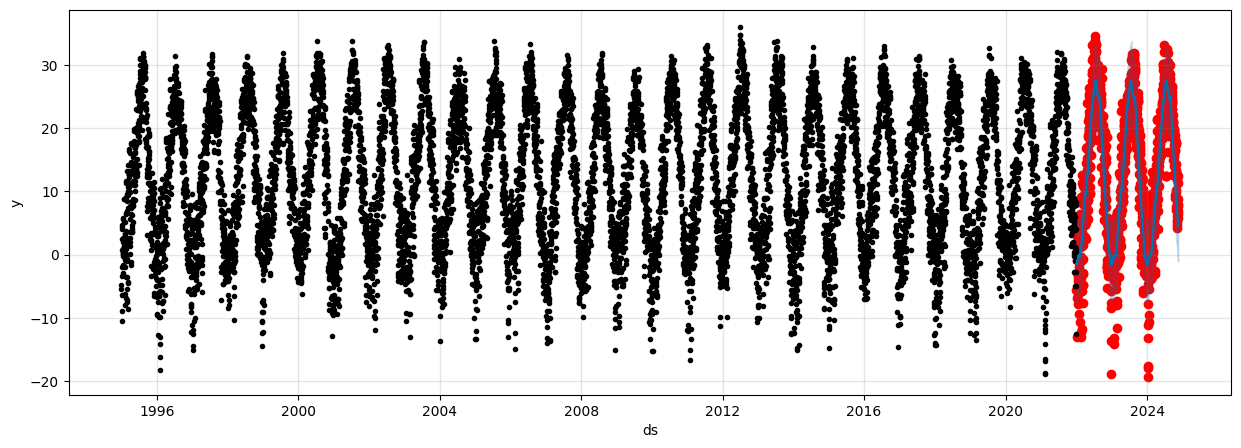

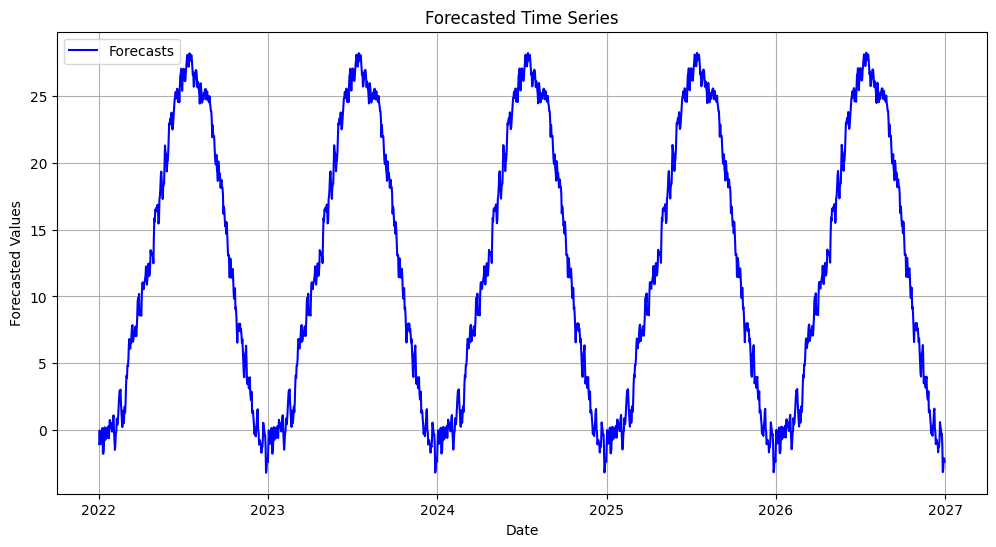

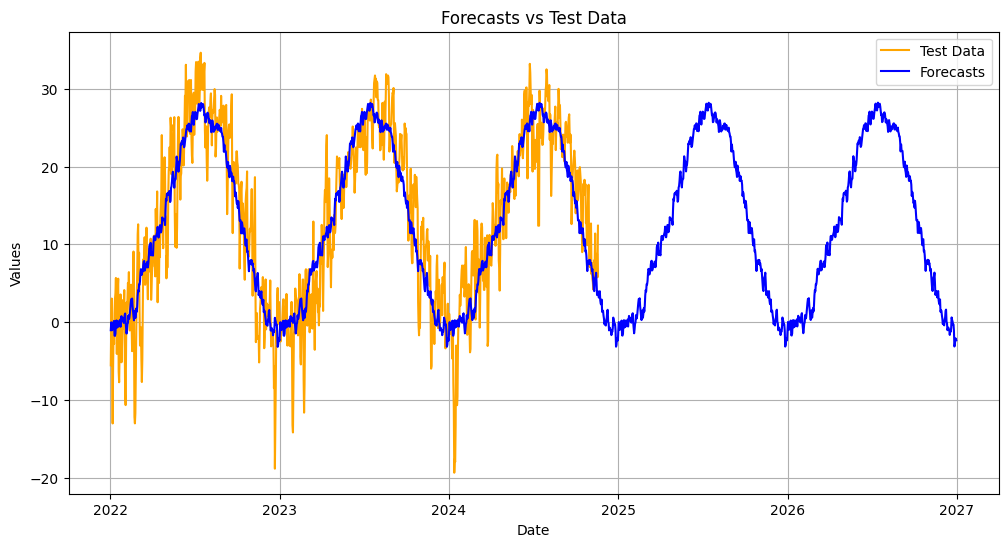

mean_squared_error:  4.7794790294329275
mean_absolute_percentage_error:  1.5584988459099725
Models for PRECTOTCORR...
Prophet...


C:\Users\hp\AppData\Local\Temp\ipykernel_22772\3342716408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
C:\Users\hp\AppData\Local\Temp\ipykernel_22772\3342716408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.rename(columns={param: 'y'}, inplace=True)
12:21:38 - cmdstanpy - INFO - Chain [1] start processing
12:21:38 - cmdstanpy - INFO - Chain [1] done processing


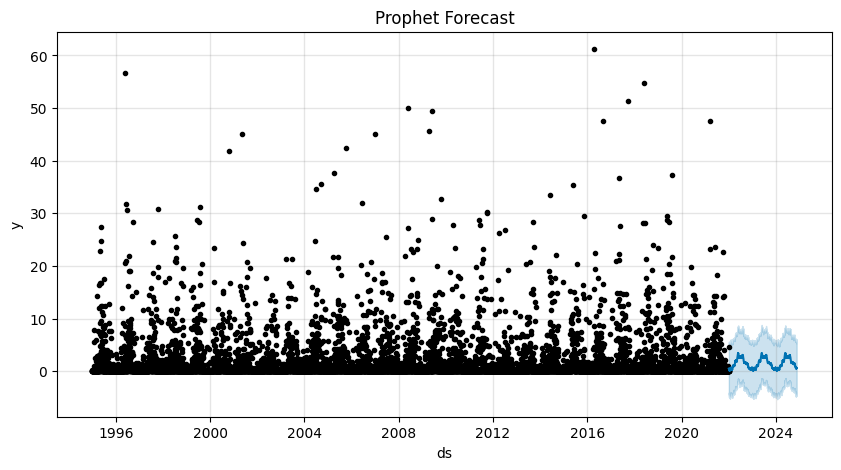

mean_squared_error:  3.7090057983199727
mean_absolute_percentage_error:  -2.7205814051964326e+17
STLForecaster...


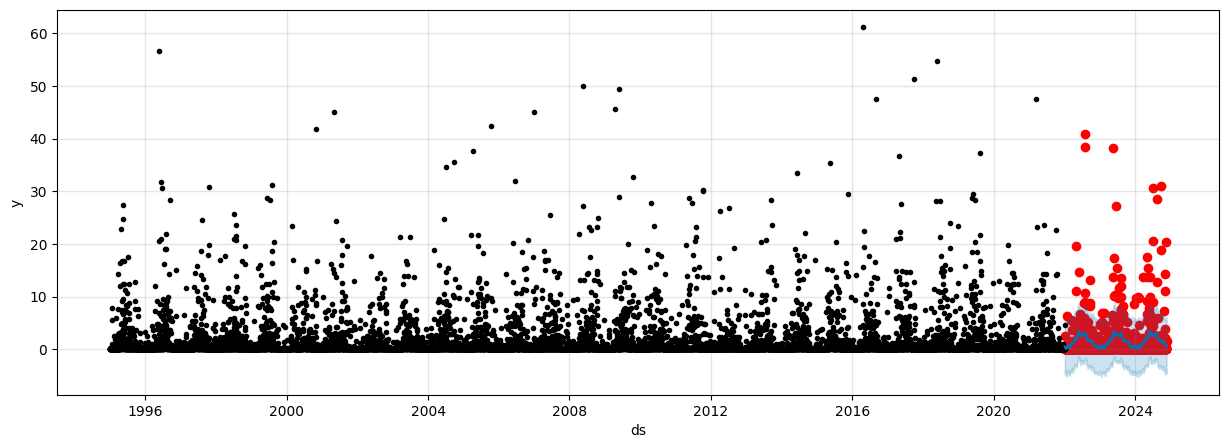

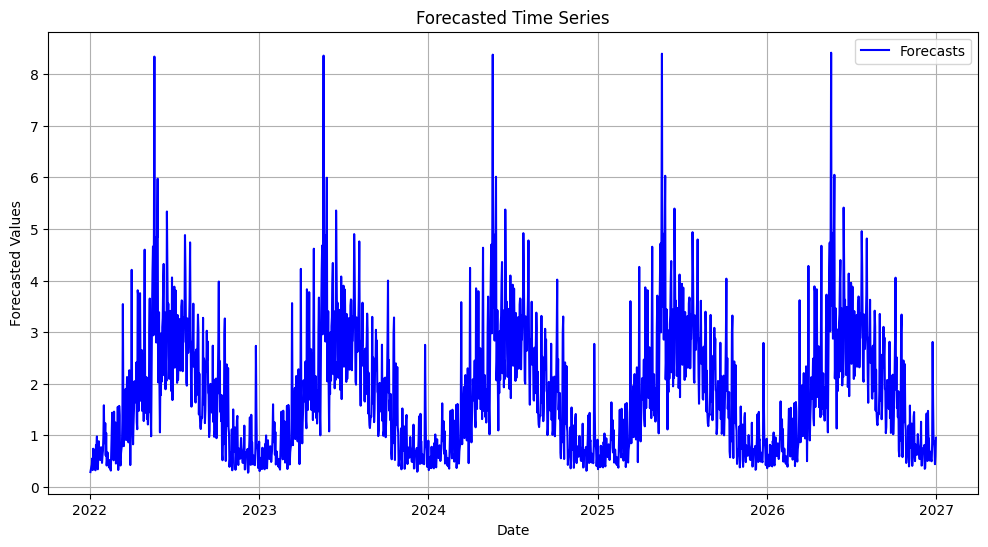

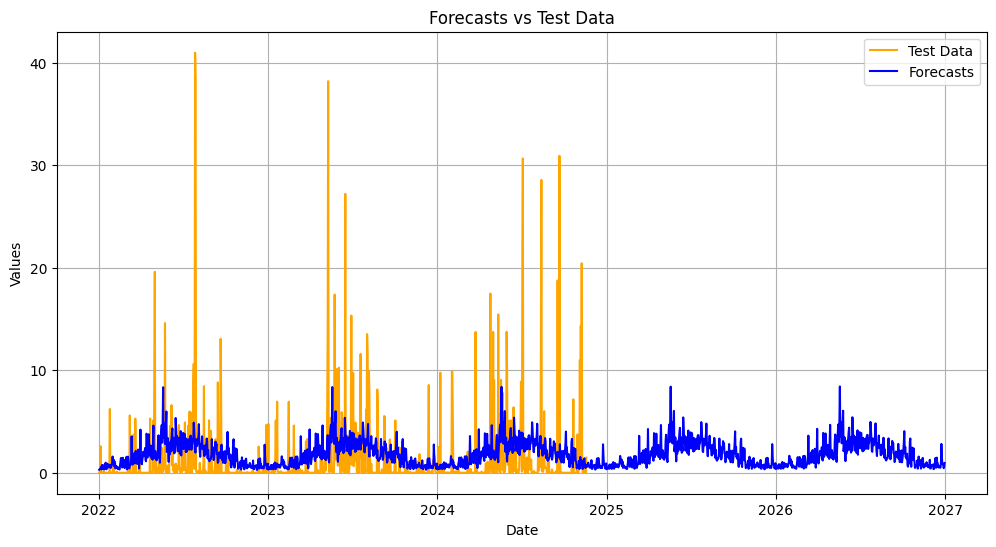

mean_squared_error:  3.845351219075734
mean_absolute_percentage_error:  -3.428346083918846e+17


In [242]:
for param in params_clim:
    print(f"Models for {param}...")
    print("Prophet...")
    dt = data_clim[["ds",param]]
    imputer = KNNImputer(n_neighbors=5)
    dt[param] = pd.DataFrame(imputer.fit_transform(dt[[param]]), columns=dt[[param]].columns)
    dt.rename(columns={param: 'y'}, inplace=True)

    split_date = '2022-01-01'
    train = dt.loc[dt["ds"] <= split_date].copy()
    test = dt.loc[dt["ds"] > split_date].copy()

    model = Prophet(growth="flat", seasonality_mode = 'additive')
    model.fit(train)
    test_fcst = model.predict(test)
    fig, ax = plt.subplots(figsize=(10, 5))
    fig = model.plot(test_fcst, ax=ax)
    ax.set_title('Prophet Forecast')
    plt.show()

    f, ax = plt.subplots(figsize=(15, 5))
    ax.scatter(test['ds'], test['y'], color='r')
    fig = model.plot(test_fcst, ax=ax)

    mse = np.sqrt(mean_squared_error(y_true=test['y'],
                   y_pred=test_fcst['yhat']))
    print(f"mean_squared_error:  {mse}")
    mape = 100*(1 - mean_absolute_percentage_error(y_true=test['y'], y_pred=test_fcst['yhat']))
    print(f"mean_absolute_percentage_error:  {mape}")

    print("STLForecaster...")
    seasonal_length_int=int(seasonal_length/data_frequency)
    model=STLForecaster(
        sp=seasonal_length_int,
        forecaster_seasonal=NaiveForecaster(
            sp=seasonal_length_int,
            strategy='mean'
        ),
        forecaster_trend=PolynomialTrendForecaster(LinearRegression()),
        robust=True,
    )
    train_h = train.copy()
    train_h['ds'] = pd.to_datetime(train_h['ds'])
    train_h.set_index('ds', inplace=True)
    model.fit(train_h)
    values_forecasting_horizon=np.arange(1, forecasting_horizon + 1, dtype='int')
    fh=ForecastingHorizon(values=values_forecasting_horizon,is_relative=True)
    forecasts=model.predict(fh=fh)
    plt.figure(figsize=(12, 6))
    plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue')

    plt.xlabel("Date")
    plt.ylabel("Forecasted Values")
    plt.title("Forecasted Time Series")
    plt.legend()
    plt.grid()
    plt.show()

    test_h = test.copy()
    test_h['ds'] = pd.to_datetime(test_h['ds'])
    test_h.set_index('ds', inplace=True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(test_h.index, test_h['y'], label="Test Data", color='orange', linestyle='-')
    plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue', linestyle='-')
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title("Forecasts vs Test Data")
    plt.legend()
    plt.grid()
    plt.show()

    merged = pd.merge(test_h, forecasts, left_index=True, right_index=True, how='inner', suffixes=('_test', '_forecast'))
    mse = np.sqrt(mean_squared_error(y_true=merged['y_test'],
                   y_pred=merged['y_forecast']))
    print(f"mean_squared_error:  {mse}")
    mape = 100*(1 - mean_absolute_percentage_error(y_true=merged['y_test'], y_pred=merged['y_forecast']))
    print(f"mean_absolute_percentage_error:  {mape}")

# Predicting Evapotranspiration Reference ET0

## Getting the data

In [10]:
et = data_rad[["ds","ET0"]]
et.head()

ds       ET0
0 1995-01-01  1.001230
1 1995-01-02  0.819602
2 1995-01-03  0.438753
3 1995-01-04  0.344787
4 1995-01-05  0.661706

## Visualization of the data

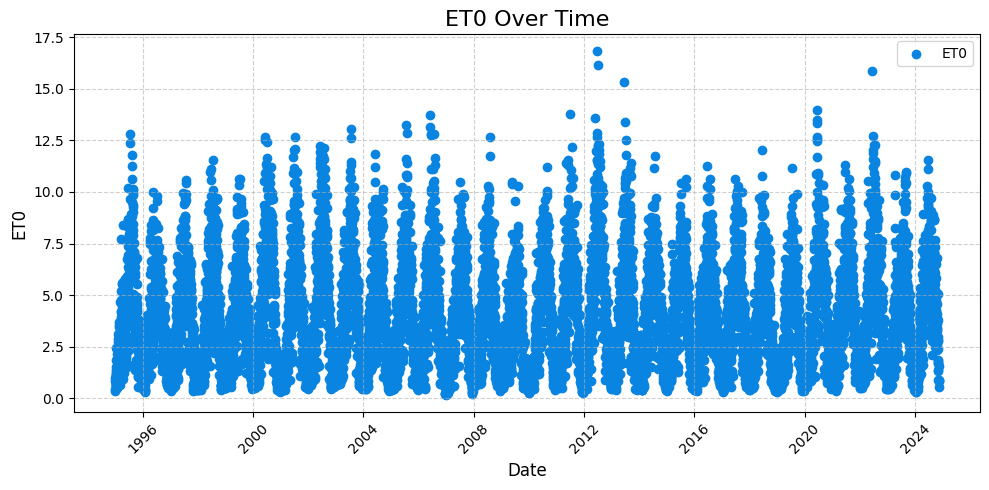

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(et['ds'], et['ET0'], marker='o', linestyle='-', color='#0984e1', label='ET0')
plt.title("ET0 Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("ET0", fontsize=12)
plt.xticks(rotation=45)

# Add a grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

This plot shows that the time series is very seasonal intuitively. It makes the job easier when it comes to predicting them. We will use a set of different models for this prediction. Here is the list: Prophet, ARIMA, SARIMA. Keep in mind that we will not necessarily go through all of them if it is not necessary.

## Data Preparation

Ths part involves task like feature engineering to be precise globally

In [12]:
from sklearn.impute import KNNImputer

We already identified some NA values in the dataset so we will come up with a solution for them. We use the KNN Imputer here because generally closest days relate to each other in a dataset. This means if yesterday was very large and tomorrow is very low then probably we are somewhere in the middle today (for climate data like Evapotranspiration). That assumption is even stronger when we take into account the fact that the time series is very seasonal with the reversed V shape for each year.

In [13]:
imputer = KNNImputer(n_neighbors=5)

et["ET0"] = pd.DataFrame(imputer.fit_transform(et[["ET0"]]), columns=et[["ET0"]].columns)

C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1659484598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  et["ET0"] = pd.DataFrame(imputer.fit_transform(et[["ET0"]]), columns=et[["ET0"]].columns)


We will not treat here outliers because the certainly are inconvenient for the models but still they are numerous and plays a great role in predicting the water needs of a crop for a given day. These are too important values to be changed in any way.

The dataset is almost clean. We did the big part of cleaning the data when extracting from NASA servers. For further understanding, you should check the code in fetch.py (extern.fetch.py) and dtmaker.py(extern.dash.dt.dtmaker.py)

## Testing stationarity in time series

In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.impute import KNNImputer

In [15]:
imputer = KNNImputer(n_neighbors=5)

et["ET0"] = pd.DataFrame(imputer.fit_transform(et[["ET0"]]), columns=et[["ET0"]].columns)

C:\Users\hp\AppData\Local\Temp\ipykernel_32188\1659484598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  et["ET0"] = pd.DataFrame(imputer.fit_transform(et[["ET0"]]), columns=et[["ET0"]].columns)


In [16]:
et.head()

ds       ET0
0 1995-01-01  1.001230
1 1995-01-02  0.819602
2 1995-01-03  0.438753
3 1995-01-04  0.344787
4 1995-01-05  0.661706

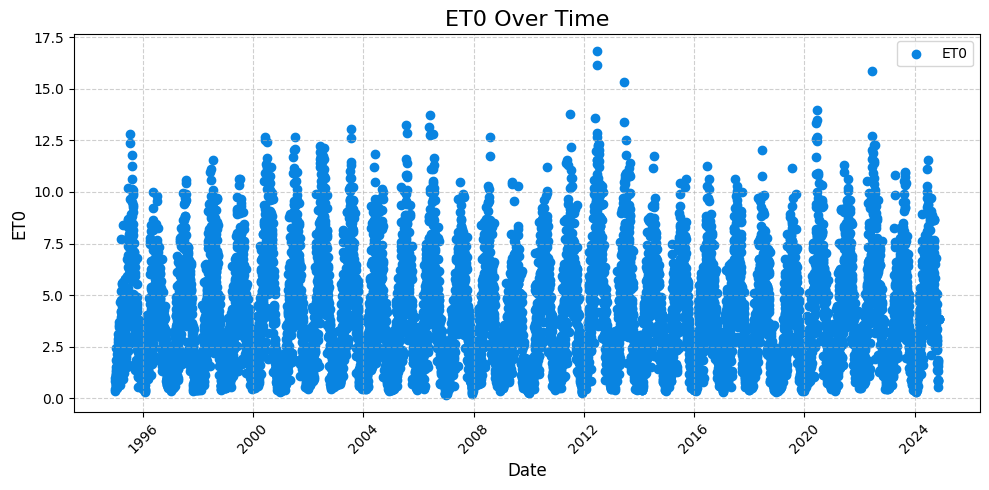

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(et['ds'], et['ET0'], marker='o', linestyle='-', color='#0984e1', label='ET0')
plt.title("ET0 Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("ET0", fontsize=12)
plt.xticks(rotation=45)

# Add a grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
def adf_test(timeseries):
  #Perform Dickey-Fuller test:
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

#apply adf test on the series
adf_test(et['ET0'])

Results of Dickey-Fuller Test:
Test Statistic                -6.586395e+00
p-value                        7.296520e-09
#Lags Used                     2.900000e+01
Number of Observations Used    1.088500e+04
Critical Value (1%)           -3.430951e+00
Critical Value (5%)           -2.861806e+00
Critical Value (10%)          -2.566911e+00
dtype: float64


This Dicker-Fuller test shows that the time series ET0 in stationary at a 1% confidence level (p-value < 0.05)

In [19]:
def kpss_test(timeseries):
  print ('Results of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print(kpss_output)

kpss_test(et['ET0'])

Results of KPSS Test:
Test Statistic            0.033997
p-value                   0.100000
Lags Used                58.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_32188\1189158974.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


The KPSS test shows the opposite (p-value > 0.05). The time series is not stationary. As the two viewed tests are telling not the same thing, we should look to the ACF plot for precision

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

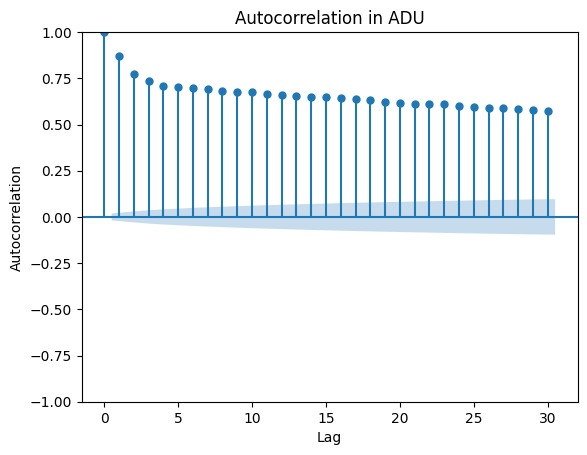

In [21]:
plot_acf(et['ET0'].dropna(), lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation in ADU')
plt.show()

This ACF plot tells that there is a problem of stationarity in the time series. This rejects the already tested assumption made by the ADF test

In [22]:
etDiff = et.diff().dropna()
etDiff.head()

ds       ET0
1 1 days -0.181628
2 1 days -0.380849
3 1 days -0.093966
4 1 days  0.316918
5 1 days -0.017721

DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>)

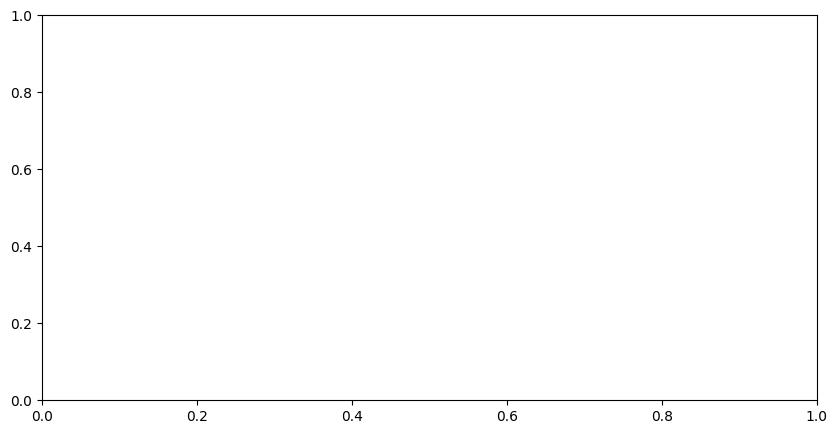

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(etDiff["ds"], etDiff['ET0'], marker='o', linestyle='-', color='#0984e1', label='ET0')
plt.title("ET0 Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("ET0", fontsize=12)
plt.xticks(rotation=45)

# Add a grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
adf_test(etDiff['ET0'])

Results of Dickey-Fuller Test:
Test Statistic                   -26.115259
p-value                            0.000000
#Lags Used                        28.000000
Number of Observations Used    10885.000000
Critical Value (1%)               -3.430951
Critical Value (5%)               -2.861806
Critical Value (10%)              -2.566911
dtype: float64


In [ ]:
kpss_test(etDiff['ET0'])

Results of KPSS Test:
Test Statistic             0.01819
p-value                    0.10000
Lags Used                278.00000
Critical Value (10%)       0.34700
Critical Value (5%)        0.46300
Critical Value (2.5%)      0.57400
Critical Value (1%)        0.73900
dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_32964\1189158974.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


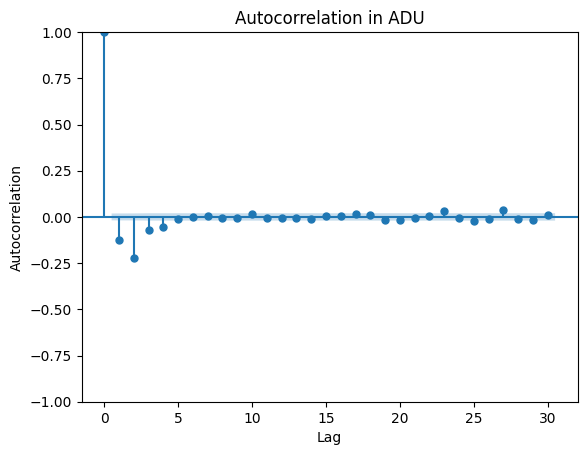

In [ ]:
plot_acf(etDiff['ET0'].dropna(), lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation in ADU')
plt.show()

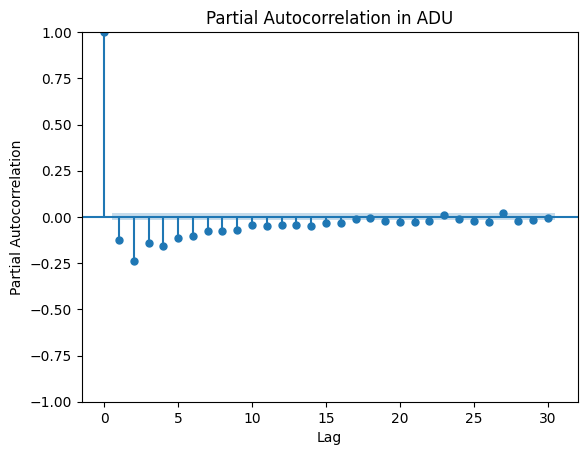

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(etDiff['ET0'].dropna(), lags=30)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation in ADU')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

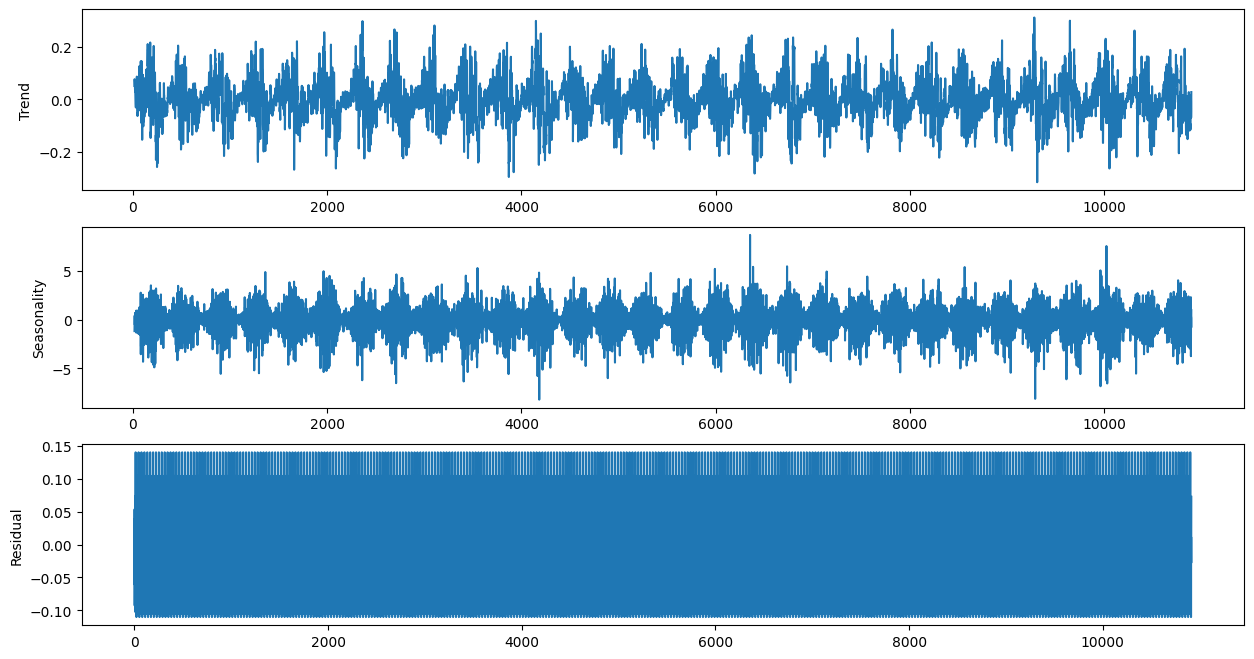

In [ ]:
res = seasonal_decompose(etDiff['ET0'].dropna(), model='additive', period=30)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "Trend")
res.resid.plot(ax=ax2,ylabel = "Seasonality")
res.seasonal.plot(ax=ax3,ylabel = "Residual")
plt.show()

## Actual models

### Prophet model

#### Feature engineering

We will not call this part feature engineering properly speaking but it does stand for it. Actually, what we are trying to do is rename et dataframe columns after Prophet columns naming convention. So we should have a 'ds' column (for the dates) and a 'y' column (for the target variable).

In [14]:
# etDiff.rename(columns={"ET0": 'y'}, inplace=True)
et.rename(columns={"ET0": 'y'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22772\3928756730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  et.rename(columns={"ET0": 'y'}, inplace=True)


In [15]:
et.head()

ds         y
0 1995-01-01  1.001230
1 1995-01-02  0.819602
2 1995-01-03  0.438753
3 1995-01-04  0.344787
4 1995-01-05  0.661706

We then have to split our dataset into a training set and testing set for the model. We choose the split date as 2018-01-01 and that is completely arbitrary. We could do it another way like taking the first 80% values for train and the remaining part for test or something like that. It would work too. But something that should be kept in mind is that we have to take continuously the first dates for train and the last dates for test, no matter what. Because, time plays an important role here. We can't just shuffle things up for prediction.

In [16]:
split_date = '2018-01-01'
train = et.loc[et["ds"] <= split_date].copy()
test = et.loc[et["ds"] > split_date].copy()

In [17]:
train.tail()

ds         y
8397 2017-12-28  0.695026
8398 2017-12-29  1.115250
8399 2017-12-30  0.516545
8400 2017-12-31  0.410884
8401 2018-01-01  0.438359

We then create the model. We choose here a simple one. We do not go through all the complex attributes of the Prophet class. What is necessary is just the fact that growth of our time series in flat (empirically from the graph and the seasonality is additive because it doesn't go up too much through the time going by).
We train the model and test it on the test set

In [18]:
model = Prophet(growth="flat", seasonality_mode = 'additive')

In [19]:
model.fit(train)

12:12:31 - cmdstanpy - INFO - Chain [1] start processing
12:12:32 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
test_fcst = model.predict(test)

In [21]:
test_fcst.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2018-01-02  3.847538   -0.970413    3.164007     3.847538     3.847538   
1 2018-01-03  3.847538   -1.082206    3.062190     3.847538     3.847538   
2 2018-01-04  3.847538   -1.094464    2.948208     3.847538     3.847538   
3 2018-01-05  3.847538   -1.029629    2.817660     3.847538     3.847538   
4 2018-01-06  3.847538   -0.860088    3.022670     3.847538     3.847538   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -2.794721             -2.794721             -2.794721  0.046264   
1       -2.822714             -2.822714             -2.822714  0.010404   
2       -2.881446             -2.881446             -2.881446 -0.058201   
3       -2.863682             -2.863682             -2.863682 -0.052244   
4       -2.779686             -2.779686             -2.779686  0.018124   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.046264      0.046264 -2.840985     -2.840985     -2.840985   
1      0.010404      0.010404 -2.833118     -2.833118     -2.833118   
2     -0.058201     -0.058201 -2.823245     -2.823245     -2.823245   
3     -0.052244     -0.052244 -2.811437     -2.811437     -2.811437   
4      0.018124      0.018124 -2.797810     -2.797810     -2.797810   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  1.052817  
1                         0.0  1.024824  
2                         0.0  0.966092  
3                         0.0  0.983856  
4                         0.0  1.067852

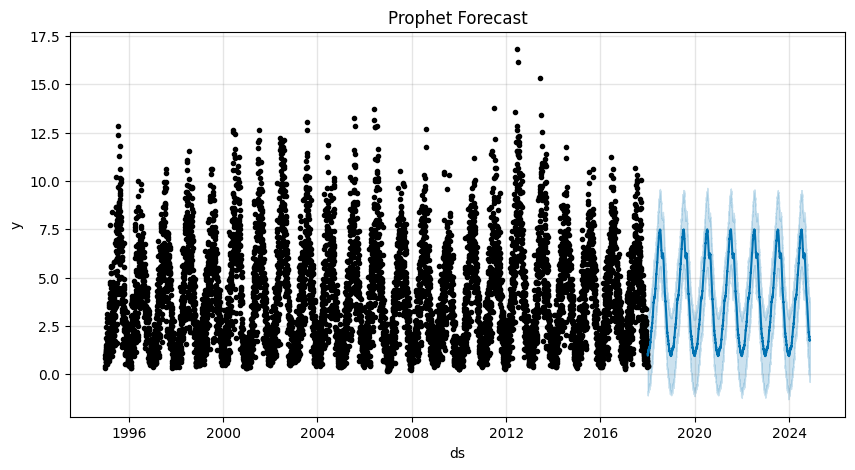

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

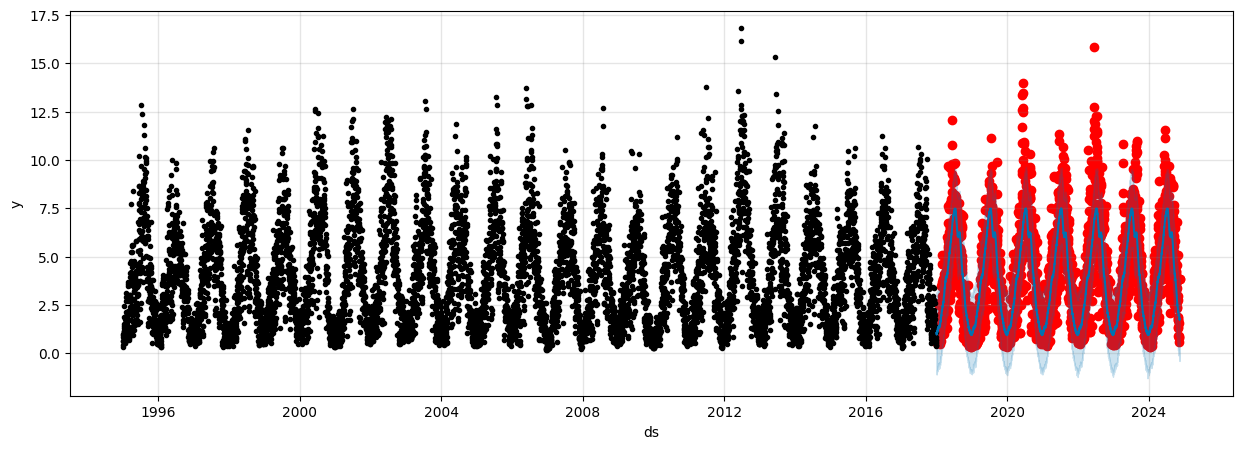

In [23]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test['ds'], test['y'], color='r')
fig = model.plot(test_fcst, ax=ax)

These graphs are good but not quite satisfying as the predicted values don't cover all the data up to the top. We will explore more models for comparison purpose. Hopefully we will get a good one

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [25]:
np.sqrt(mean_squared_error(y_true=test['y'],
                   y_pred=test_fcst['yhat']))

np.float64(1.5600246121690375)

In [26]:
100*(1 - mean_absolute_percentage_error(y_true=test['y'], y_pred=test_fcst['yhat']))

np.float64(58.37113511429999)

We do realise it more when we see that the accuracy is 58% through the test set

### STL Forecaster

In [27]:
split_date = '2023-01-01'
train = et.loc[et["ds"] <= split_date].copy()
test = et.loc[et["ds"] > split_date].copy()

In [113]:
from sktime.forecasting.trend import STLForecaster,PolynomialTrendForecaster
from sktime.forecasting.base import ForecastingHorizon
from sklearn.linear_model import LinearRegression
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from pandas import Timedelta, DateOffset
from numpy import log, exp, arange

In [49]:
forecasting_horizon=5*365
seasonal_length=Timedelta(days=365)
data_frequency=Timedelta(days=1)

In [116]:
seasonal_length_int=int(seasonal_length/data_frequency)
model=STLForecaster(
    sp=seasonal_length_int,
    forecaster_seasonal=NaiveForecaster(
        sp=seasonal_length_int,
        strategy='mean'
    ),
    forecaster_trend=PolynomialTrendForecaster(LinearRegression()),
    robust=True,
)

In [68]:
train_h = train.copy()
train_h['ds'] = pd.to_datetime(train_h['ds'])
train_h.set_index('ds', inplace=True)

In [40]:
train_h.head()

y
ds                  
1995-01-01  1.001230
1995-01-02  0.819602
1995-01-03  0.438753
1995-01-04  0.344787
1995-01-05  0.661706

In [117]:
model.fit(log(train_h))

STLForecaster(forecaster_seasonal=NaiveForecaster(sp=365, strategy='mean'),
              forecaster_trend=PolynomialTrendForecaster(regressor=LinearRegression()),
              robust=True, sp=365)

In [122]:
values_forecasting_horizon=np.arange(1, forecasting_horizon + 1, dtype='int')
fh=ForecastingHorizon(values=values_forecasting_horizon,is_relative=True)
forecasts=exp(model.predict(fh=fh))

In [123]:
forecasts

y
2023-01-02  0.953662
2023-01-03  1.151960
2023-01-04  1.059612
2023-01-05  0.987974
2023-01-06  1.059668
...              ...
2027-12-27  0.817221
2027-12-28  0.821918
2027-12-29  0.904631
2027-12-30  0.879881
2027-12-31  0.849298

[1825 rows x 1 columns]

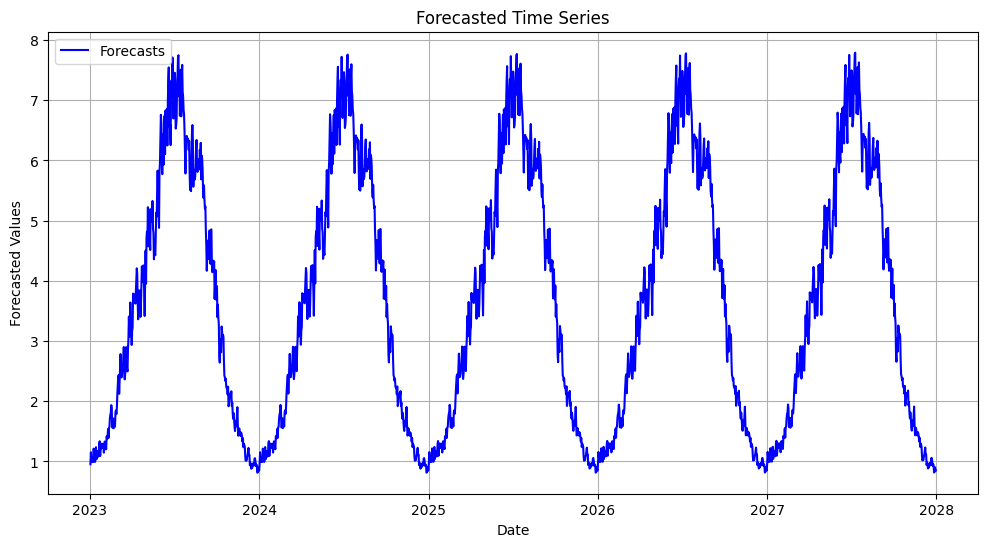

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Forecasted Values")
plt.title("Forecasted Time Series")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [108]:
test_h = test.copy()
test_h['ds'] = pd.to_datetime(test_h['ds'])
test_h.set_index('ds', inplace=True)

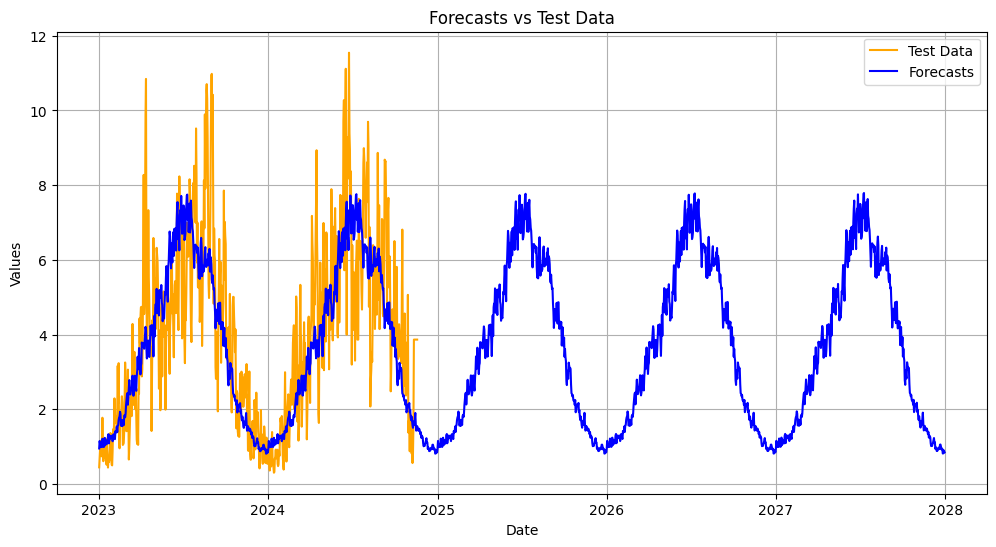

In [125]:
plt.figure(figsize=(12, 6))

# Plot test data
plt.plot(test_h.index, test_h['y'], label="Test Data", color='orange', linestyle='-')

# Plot forecasts
plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue', linestyle='-')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Forecasts vs Test Data")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [58]:
test_h.head()

y
ds                  
2023-01-02  0.447965
2023-01-03  0.687276
2023-01-04  0.929249
2023-01-05  1.158668
2023-01-06  0.847959

In [126]:
merged = pd.merge(test_h, forecasts, left_index=True, right_index=True, how='inner', suffixes=('_test', '_forecast'))

In [127]:
merged.head()

y_test  y_forecast
2023-01-02  0.447965    0.953662
2023-01-03  0.687276    1.151960
2023-01-04  0.929249    1.059612
2023-01-05  1.158668    0.987974
2023-01-06  0.847959    1.059668

In [128]:
np.sqrt(mean_squared_error(y_true=merged['y_test'],
                   y_pred=merged['y_forecast']))

np.float64(1.603496500776608)

In [129]:
100*(1 - mean_absolute_percentage_error(y_true=merged['y_test'], y_pred=merged['y_forecast']))

np.float64(63.26160932386511)

# Predicting ALLSKY_SFC_SW_DWN

In [130]:
allsky_sfc_sw_dwn = data_rad[["ds","ALLSKY_SFC_SW_DWN"]]
allsky_sfc_sw_dwn.head()

ds  ALLSKY_SFC_SW_DWN
0 1995-01-01               7.75
1 1995-01-02               5.94
2 1995-01-03               8.19
3 1995-01-04               8.04
4 1995-01-05               3.78

In [131]:
imputer = KNNImputer(n_neighbors=5)

allsky_sfc_sw_dwn["ALLSKY_SFC_SW_DWN"] = pd.DataFrame(imputer.fit_transform(allsky_sfc_sw_dwn[["ALLSKY_SFC_SW_DWN"]]), columns=allsky_sfc_sw_dwn[["ALLSKY_SFC_SW_DWN"]].columns)

C:\Users\hp\AppData\Local\Temp\ipykernel_22772\6724568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allsky_sfc_sw_dwn["ALLSKY_SFC_SW_DWN"] = pd.DataFrame(imputer.fit_transform(allsky_sfc_sw_dwn[["ALLSKY_SFC_SW_DWN"]]), columns=allsky_sfc_sw_dwn[["ALLSKY_SFC_SW_DWN"]].columns)


In [132]:
allsky_sfc_sw_dwn.rename(columns={"ALLSKY_SFC_SW_DWN": 'y'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22772\3429571636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allsky_sfc_sw_dwn.rename(columns={"ALLSKY_SFC_SW_DWN": 'y'}, inplace=True)


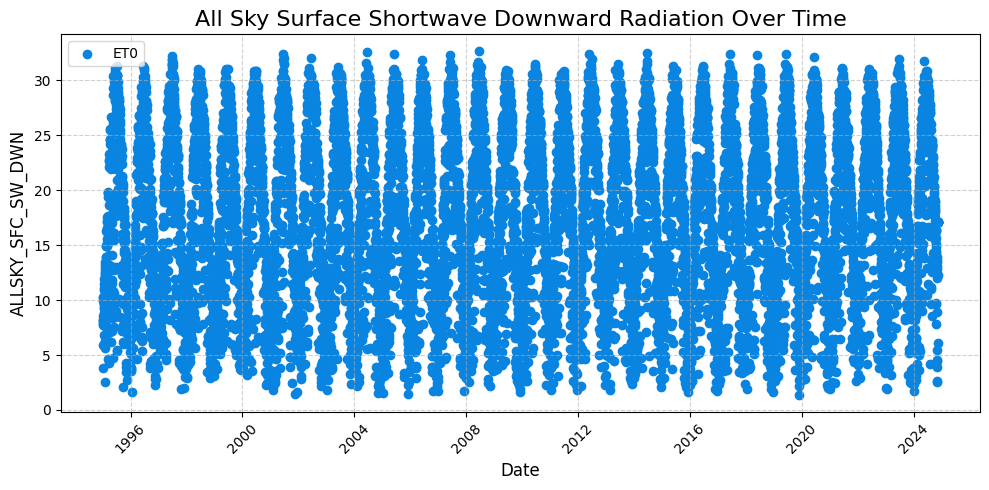

In [133]:
plt.figure(figsize=(10, 5))
plt.scatter(allsky_sfc_sw_dwn['ds'], allsky_sfc_sw_dwn['y'], marker='o', linestyle='-', color='#0984e1', label='ET0')
plt.title("All Sky Surface Shortwave Downward Radiation Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("ALLSKY_SFC_SW_DWN", fontsize=12)
plt.xticks(rotation=45)

# Add a grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Prophet

In [134]:
train = allsky_sfc_sw_dwn.loc[allsky_sfc_sw_dwn["ds"] <= split_date].copy()
test = allsky_sfc_sw_dwn.loc[allsky_sfc_sw_dwn["ds"] > split_date].copy()

In [135]:
model_allsky_sfc_sw_dwn = Prophet(growth="flat", seasonality_mode = 'additive')

In [136]:
model_allsky_sfc_sw_dwn.fit(train)

07:32:32 - cmdstanpy - INFO - Chain [1] start processing
07:32:32 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
test_fcst = model_allsky_sfc_sw_dwn.predict(test)

In [138]:
test_fcst.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2023-01-02  17.083681    2.195779   13.988718    17.083681    17.083681   
1 2023-01-03  17.083681    1.828175   13.962023    17.083681    17.083681   
2 2023-01-04  17.083681    1.617024   14.222851    17.083681    17.083681   
3 2023-01-05  17.083681    1.748272   14.026492    17.083681    17.083681   
4 2023-01-06  17.083681    2.107802   14.280277    17.083681    17.083681   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -9.079842             -9.079842             -9.079842  0.057095   
1       -8.986851             -8.986851             -8.986851  0.078833   
2       -9.047544             -9.047544             -9.047544 -0.058928   
3       -9.021998             -9.021998             -9.021998 -0.115416   
4       -8.809774             -8.809774             -8.809774  0.010743   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0      0.057095      0.057095 -9.136937     -9.136937     -9.136937   
1      0.078833      0.078833 -9.065684     -9.065684     -9.065684   
2     -0.058928     -0.058928 -8.988616     -8.988616     -8.988616   
3     -0.115416     -0.115416 -8.906582     -8.906582     -8.906582   
4      0.010743      0.010743 -8.820518     -8.820518     -8.820518   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  8.003839  
1                         0.0  8.096830  
2                         0.0  8.036137  
3                         0.0  8.061683  
4                         0.0  8.273907

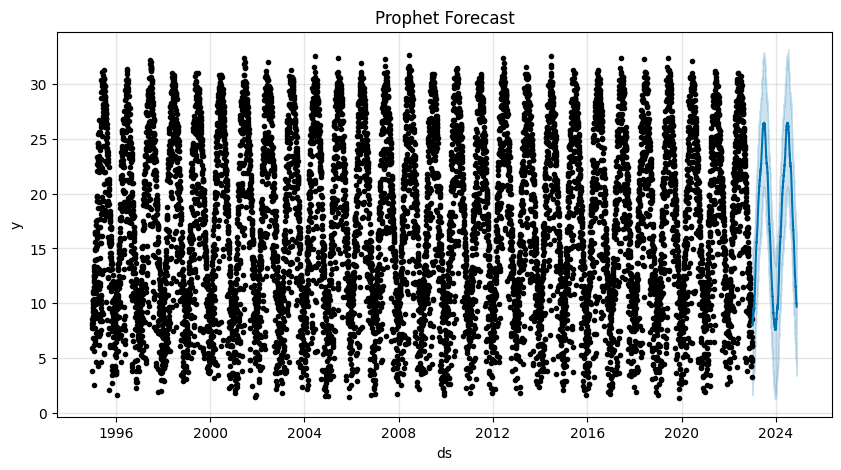

In [139]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model_allsky_sfc_sw_dwn.plot(test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

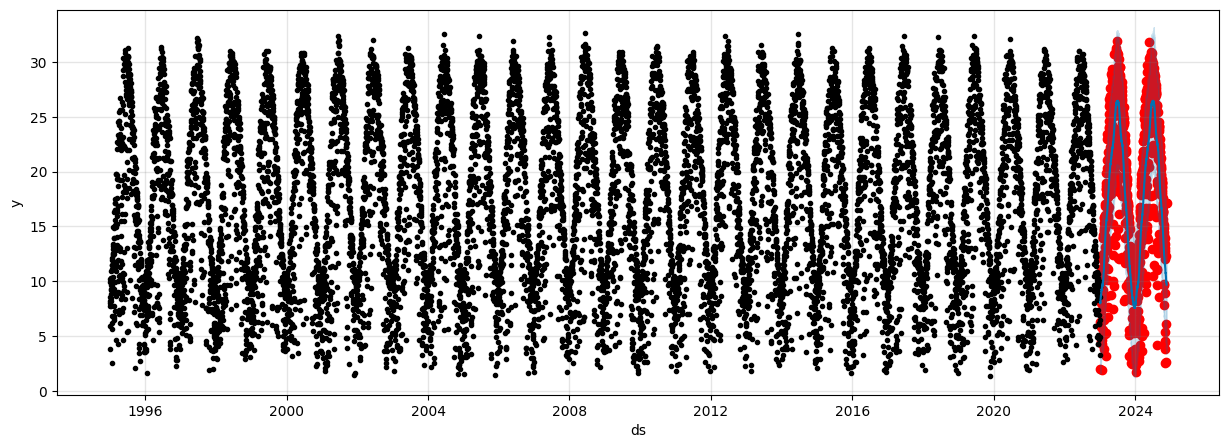

In [140]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test['ds'], test['y'], color='r')
fig = model_allsky_sfc_sw_dwn.plot(test_fcst, ax=ax)

In [141]:
np.sqrt(mean_squared_error(y_true=test['y'],
                   y_pred=test_fcst['yhat']))

np.float64(4.751965689734902)

In [142]:
100*(1 - mean_absolute_percentage_error(y_true=test['y'], y_pred=test_fcst['yhat']))

np.float64(65.44612602956289)

## STLForecaster

In [144]:
split_date = '2023-01-01'
train = allsky_sfc_sw_dwn.loc[allsky_sfc_sw_dwn["ds"] <= split_date].copy()
test = allsky_sfc_sw_dwn.loc[allsky_sfc_sw_dwn["ds"] > split_date].copy()

In [145]:
seasonal_length_int=int(seasonal_length/data_frequency)
model=STLForecaster(
    sp=seasonal_length_int,
    forecaster_seasonal=NaiveForecaster(
        sp=seasonal_length_int,
        strategy='mean'
    ),
    forecaster_trend=PolynomialTrendForecaster(LinearRegression()),
    robust=True,
)

In [146]:
train_h = train.copy()
train_h['ds'] = pd.to_datetime(train_h['ds'])
train_h.set_index('ds', inplace=True)

In [147]:
train_h.head()

y
ds              
1995-01-01  7.75
1995-01-02  5.94
1995-01-03  8.19
1995-01-04  8.04
1995-01-05  3.78

In [148]:
model.fit(log(train_h))

STLForecaster(forecaster_seasonal=NaiveForecaster(sp=365, strategy='mean'),
              forecaster_trend=PolynomialTrendForecaster(regressor=LinearRegression()),
              robust=True, sp=365)

In [149]:
values_forecasting_horizon=np.arange(1, forecasting_horizon + 1, dtype='int')
fh=ForecastingHorizon(values=values_forecasting_horizon,is_relative=True)
forecasts=exp(model.predict(fh=fh))

In [150]:
forecasts

y
2023-01-02  9.095633
2023-01-03  9.298585
2023-01-04  8.802033
2023-01-05  8.446057
2023-01-06  8.046774
...              ...
2027-12-27  7.213288
2027-12-28  7.345253
2027-12-29  7.606664
2027-12-30  7.945071
2027-12-31  8.131281

[1825 rows x 1 columns]

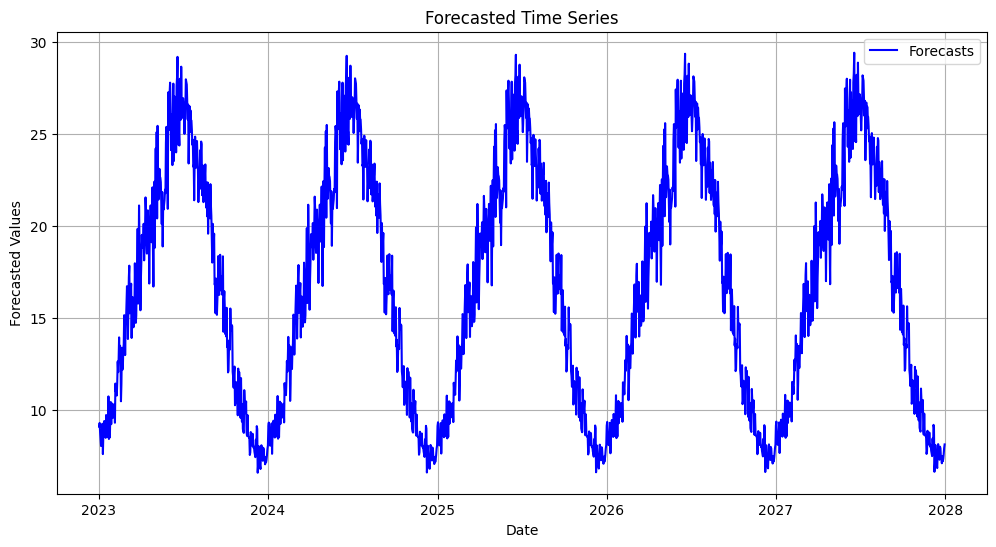

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue')

plt.xlabel("Date")
plt.ylabel("Forecasted Values")
plt.title("Forecasted Time Series")
plt.legend()
plt.grid()

plt.show()

In [152]:
test_h = test.copy()
test_h['ds'] = pd.to_datetime(test_h['ds'])
test_h.set_index('ds', inplace=True)

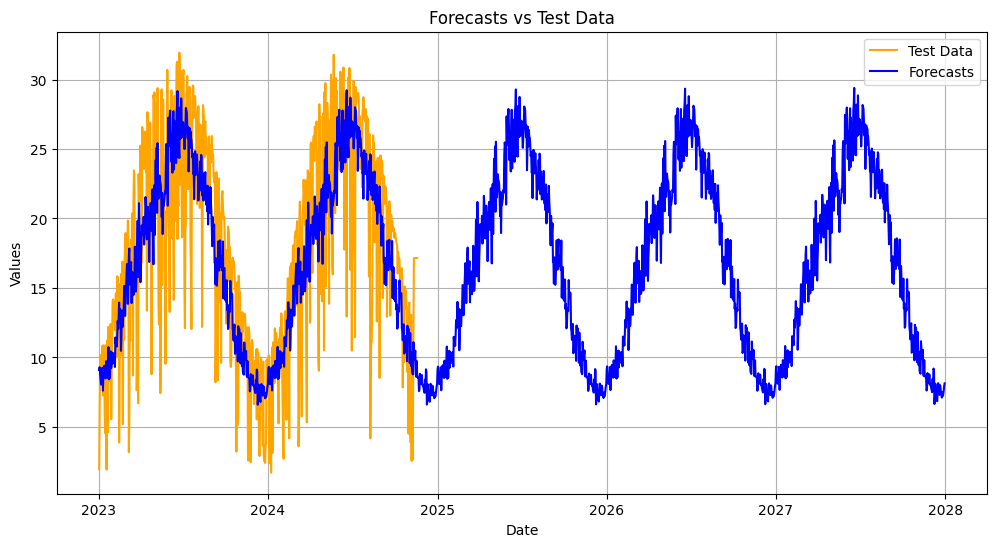

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(test_h.index, test_h['y'], label="Test Data", color='orange', linestyle='-')
plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Forecasts vs Test Data")
plt.legend()
plt.grid()

plt.show()

In [154]:
merged = pd.merge(test_h, forecasts, left_index=True, right_index=True, how='inner', suffixes=('_test', '_forecast'))

In [155]:
merged.head()

y_test  y_forecast
2023-01-02    1.96    9.095633
2023-01-03    6.30    9.298585
2023-01-04    9.31    8.802033
2023-01-05   10.14    8.446057
2023-01-06   10.18    8.046774

In [156]:
np.sqrt(mean_squared_error(y_true=merged['y_test'],
                   y_pred=merged['y_forecast']))

np.float64(5.077682157249179)

In [157]:
100*(1 - mean_absolute_percentage_error(y_true=merged['y_test'], y_pred=merged['y_forecast']))

np.float64(64.50868596714785)

# Predicting WS2M

In [163]:
ws2m = data_rad[["ds","WS2M"]]
ws2m.head()

ds  WS2M
0 1995-01-01  3.55
1 1995-01-02  2.45
2 1995-01-03  2.18
3 1995-01-04  2.59
4 1995-01-05  5.77

In [164]:
imputer = KNNImputer(n_neighbors=5)

ws2m["WS2M"] = pd.DataFrame(imputer.fit_transform(ws2m[["WS2M"]]), columns=ws2m[["WS2M"]].columns)

C:\Users\hp\AppData\Local\Temp\ipykernel_22772\4222446561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws2m["WS2M"] = pd.DataFrame(imputer.fit_transform(ws2m[["WS2M"]]), columns=ws2m[["WS2M"]].columns)


In [165]:
ws2m.rename(columns={"WS2M": 'y'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22772\3044888552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws2m.rename(columns={"WS2M": 'y'}, inplace=True)


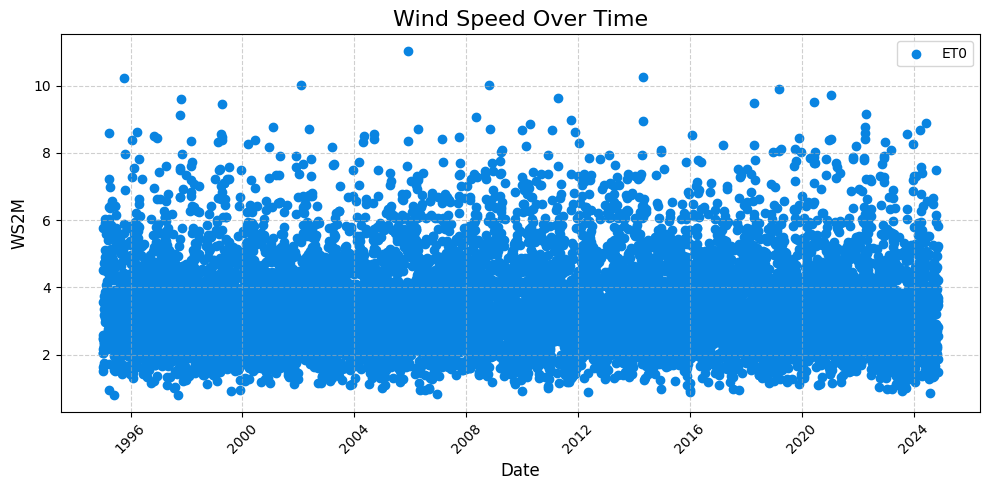

In [166]:
plt.figure(figsize=(10, 5))
plt.scatter(ws2m['ds'], ws2m['y'], marker='o', linestyle='-', color='#0984e1', label='ET0')
plt.title("Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("WS2M", fontsize=12)
plt.xticks(rotation=45)

# Add a grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Prophet

In [168]:
train = ws2m.loc[ws2m["ds"] <= split_date].copy()
test = ws2m.loc[ws2m["ds"] > split_date].copy()

In [171]:
model_ws2m = Prophet(growth="flat", seasonality_mode = 'additive')

In [172]:
model_ws2m.fit(train)

08:01:21 - cmdstanpy - INFO - Chain [1] start processing
08:01:21 - cmdstanpy - INFO - Chain [1] done processing


In [173]:
test_fcst = model_ws2m.predict(test)

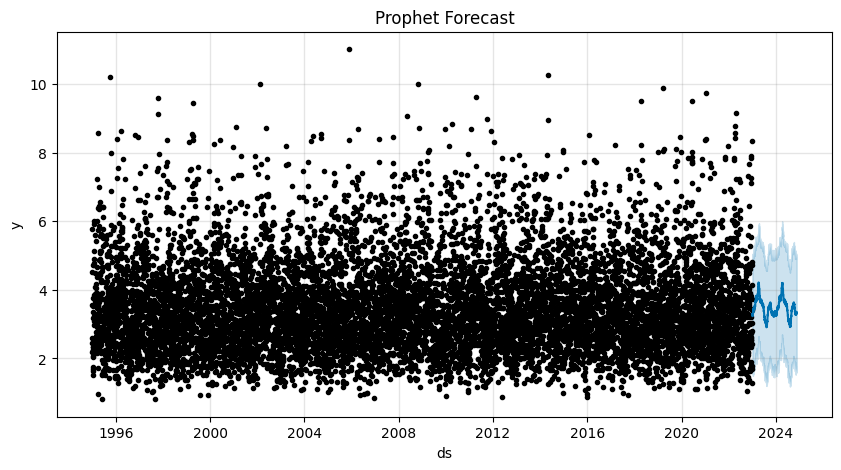

In [174]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model_ws2m.plot(test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

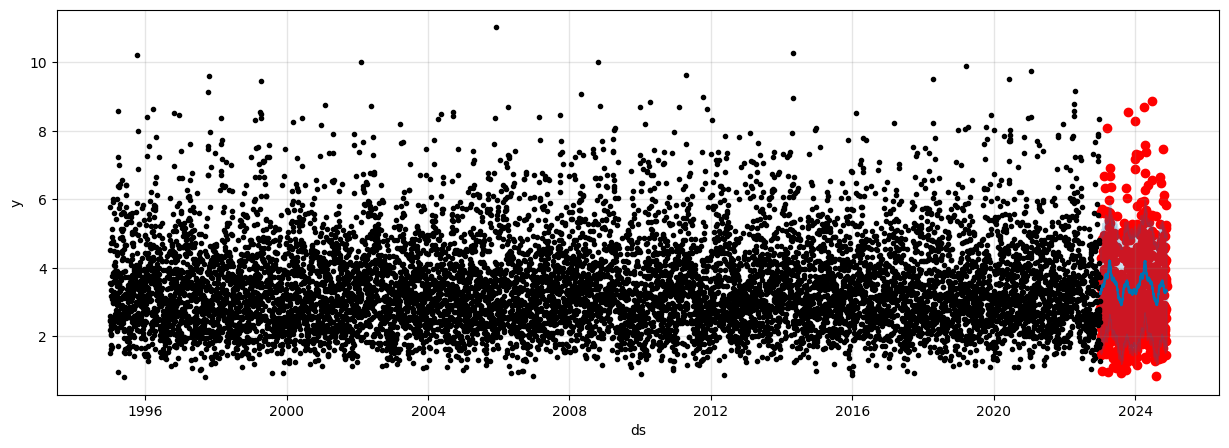

In [175]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test['ds'], test['y'], color='r')
fig = model_ws2m.plot(test_fcst, ax=ax)

In [176]:
np.sqrt(mean_squared_error(y_true=test['y'],
                   y_pred=test_fcst['yhat']))

np.float64(1.3033916825482619)

In [177]:
100*(1 - mean_absolute_percentage_error(y_true=test['y'], y_pred=test_fcst['yhat']))

np.float64(60.4802306264524)

## STLForecaster

In [178]:
split_date = '2023-01-01'
train = ws2m.loc[ws2m["ds"] <= split_date].copy()
test = ws2m.loc[ws2m["ds"] > split_date].copy()

In [217]:
seasonal_length_int=int(seasonal_length/data_frequency)
model=STLForecaster(
    sp=seasonal_length_int,
    forecaster_seasonal=NaiveForecaster(
        sp=seasonal_length_int,
        strategy='mean'
    ),
    forecaster_trend=PolynomialTrendForecaster(LinearRegression()),
    robust=True,
)

In [218]:
train_h = train.copy()
train_h['ds'] = pd.to_datetime(train_h['ds'])
train_h.set_index('ds', inplace=True)

In [219]:
model.fit(log(train_h))

STLForecaster(forecaster_seasonal=NaiveForecaster(sp=365, strategy='mean'),
              forecaster_trend=PolynomialTrendForecaster(regressor=LinearRegression()),
              robust=True, sp=365)

In [220]:
values_forecasting_horizon=np.arange(1, forecasting_horizon + 1, dtype='int')
fh=ForecastingHorizon(values=values_forecasting_horizon,is_relative=True)
forecasts=exp(model.predict(fh=fh))

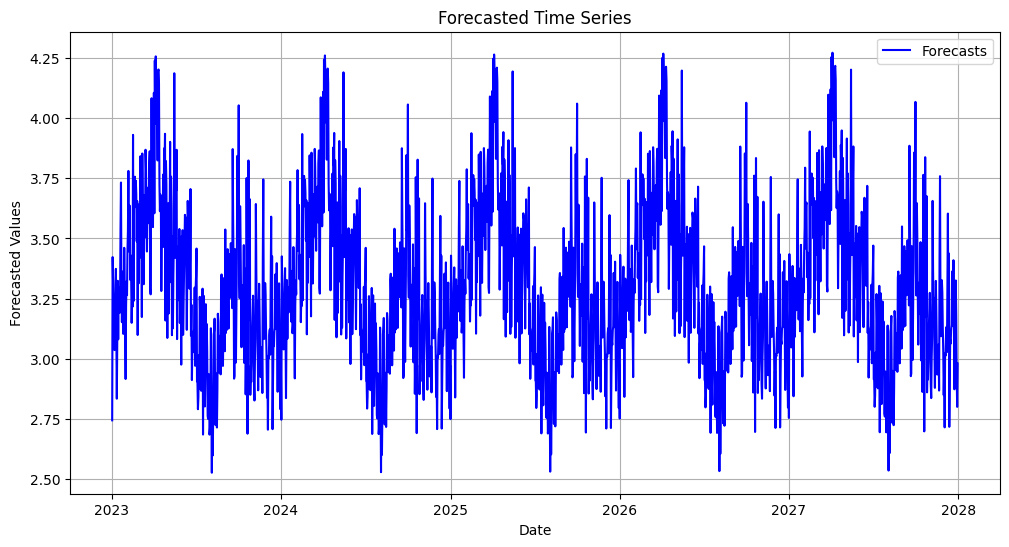

In [221]:
plt.figure(figsize=(12, 6))
plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue')

plt.xlabel("Date")
plt.ylabel("Forecasted Values")
plt.title("Forecasted Time Series")
plt.legend()
plt.grid()

plt.show()

In [222]:
test_h = test.copy()
test_h['ds'] = pd.to_datetime(test_h['ds'])
test_h.set_index('ds', inplace=True)

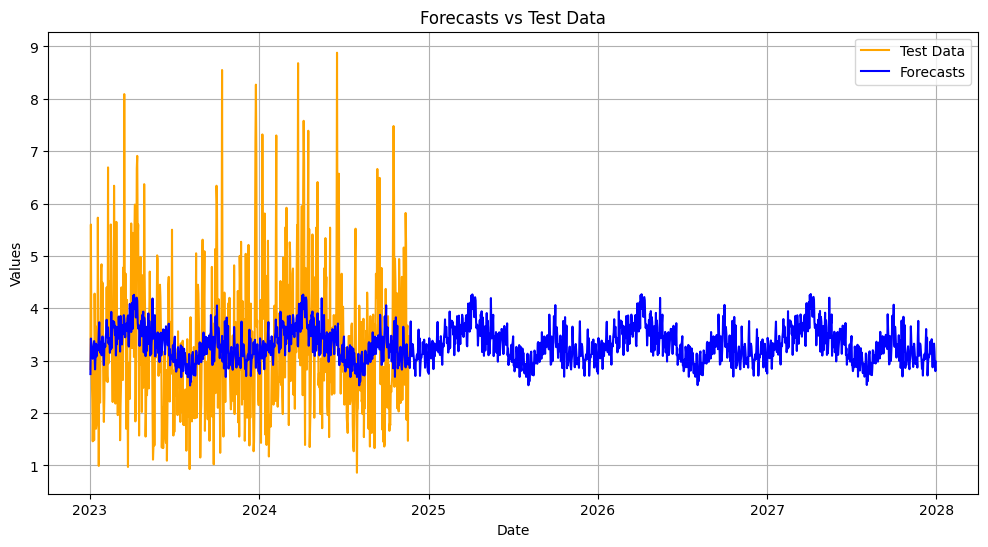

In [223]:
plt.figure(figsize=(12, 6))
plt.plot(test_h.index, test_h['y'], label="Test Data", color='orange', linestyle='-')
plt.plot(forecasts.index, forecasts['y'], label="Forecasts", color='blue', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Forecasts vs Test Data")
plt.legend()
plt.grid()

plt.show()

In [224]:
merged = pd.merge(test_h, forecasts, left_index=True, right_index=True, how='inner', suffixes=('_test', '_forecast'))

In [225]:
merged.head()

y_test  y_forecast
2023-01-02    2.84    2.743881
2023-01-03    5.60    3.422689
2023-01-04    3.44    3.311679
2023-01-05    2.65    3.068301
2023-01-06    2.26    3.207271

In [226]:
np.sqrt(mean_squared_error(y_true=merged['y_test'],
                   y_pred=merged['y_forecast']))

np.float64(1.3032386764665023)

In [227]:
100*(1 - mean_absolute_percentage_error(y_true=merged['y_test'], y_pred=merged['y_forecast']))

np.float64(63.0447294799084)

# Predicting PRECTOTCORR

In [228]:
precip = data_clim[["ds","PRECTOTCORR"]]
precip.head()

ds  PRECTOTCORR
0 1995-01-01         0.01
1 1995-01-02         0.20
2 1995-01-03         0.03
3 1995-01-04         0.00
4 1995-01-05         0.03

In [229]:
imputer = KNNImputer(n_neighbors=5)

precip["PRECTOTCORR"] = pd.DataFrame(imputer.fit_transform(precip[["PRECTOTCORR"]]), columns=precip[["PRECTOTCORR"]].columns)

C:\Users\hp\AppData\Local\Temp\ipykernel_22772\538657254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip["PRECTOTCORR"] = pd.DataFrame(imputer.fit_transform(precip[["PRECTOTCORR"]]), columns=precip[["PRECTOTCORR"]].columns)


In [230]:
precip.rename(columns={"PRECTOTCORR": 'y'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22772\1129909042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip.rename(columns={"PRECTOTCORR": 'y'}, inplace=True)


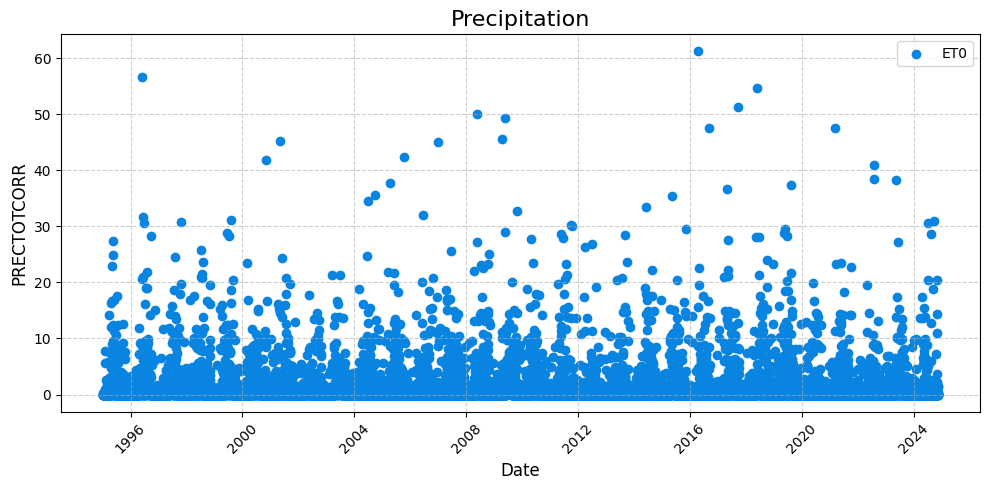

In [232]:
plt.figure(figsize=(10, 5))
plt.scatter(precip['ds'], precip['y'], marker='o', linestyle='-', color='#0984e1', label='ET0')
plt.title("Precipitation", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("PRECTOTCORR", fontsize=12)
plt.xticks(rotation=45)

# Add a grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Prophet

In [233]:
train = precip.loc[precip["ds"] <= split_date].copy()
test = precip.loc[precip["ds"] > split_date].copy()

In [234]:
model_precip = Prophet(growth='flat', seasonality_mode='additive')

In [235]:
train.head()

ds     y
0 1995-01-01  0.01
1 1995-01-02  0.20
2 1995-01-03  0.03
3 1995-01-04  0.00
4 1995-01-05  0.03

In [ ]:
model_precip.fit()